# Demo for Waterbirds case study
### Required packages
- pytorch==1.7.1 
- tensorflow==2.7.0 

In [1]:
import sys
import numpy as np
path = '/folder/path/here/'
sys.path.append(path + 'data/waterbirds/')
sys.path.append(path + 'utils/')
from waterbirds_LR import load_waterbirds_data_full
from sklearn.model_selection import train_test_split
import torch
from waterbirds import waterbirds
from baselines import fit_dro, fit_gdro
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Target environment $\{1, 2\}$

In [2]:
target_env = [1, 2]

full_data, n_groups = load_waterbirds_data_full(path + 'data/waterbirds/', label_noise=0., frac=1.0)
(train_x, train_y, train_g), (test_x, test_y, test_g) = full_data

# target environment from test data
conditions = np.zeros(shape = (test_g.shape[0], len(target_env)), dtype = bool)
for i, e in enumerate(target_env):
    conditions[:, i] = test_g == e
condition = conditions.any(axis = 1)
target_x, target_y, target_g = test_x[condition], test_y[condition], test_g[condition]

Str_x, Sts_x, Str_y, Sts_y, Str_g, Sts_g = train_test_split(train_x, train_y, train_g, random_state=0, test_size=0.1)


Ttr_x, Tts_x, Ttr_y, Tts_y, Ttr_g, Tts_g = train_test_split(target_x, target_y, target_g, random_state=0, test_size=0.1)

### ExTRA, S->T, $\text{RW}_{\text{gr}}$

In [3]:
# hyperparameters for iteration 0
ITER = 0
epochs = 400
lr = 1e-4
batch_size = 500
calibrate = 'VS'

# ExTRA results
results_ExTRA = waterbirds(full_data, batch_size = batch_size, epochs = epochs,
                           target_env = target_env, calibrate = calibrate, ITER = ITER,
                           device = device)

Fitting on 100% data...
Source on source accuracy 0.9604166666666667
epoch: 1/400


100%|█████████████| 8/8 [00:00<00:00, 52.30batch/s, KL=0.0639, normalizer=0.187]


epoch: 2/400


100%|█████████████| 8/8 [00:00<00:00, 61.82batch/s, KL=0.0484, normalizer=0.165]


epoch: 3/400


100%|██████████████| 8/8 [00:00<00:00, 61.43batch/s, KL=0.0358, normalizer=0.15]


epoch: 4/400


100%|██████████████| 8/8 [00:00<00:00, 59.25batch/s, KL=0.023, normalizer=0.141]


epoch: 5/400


100%|████████████| 8/8 [00:00<00:00, 66.76batch/s, KL=0.00843, normalizer=0.135]


epoch: 6/400


100%|████████████| 8/8 [00:00<00:00, 67.42batch/s, KL=-.00769, normalizer=0.132]


epoch: 7/400


100%|██████████████| 8/8 [00:00<00:00, 67.52batch/s, KL=-.0246, normalizer=0.13]


epoch: 8/400


100%|█████████████| 8/8 [00:00<00:00, 65.91batch/s, KL=-.0417, normalizer=0.128]


epoch: 9/400


100%|█████████████| 8/8 [00:00<00:00, 68.31batch/s, KL=-.0586, normalizer=0.126]


epoch: 10/400


100%|█████████████| 8/8 [00:00<00:00, 65.17batch/s, KL=-.0753, normalizer=0.124]


epoch: 11/400


100%|█████████████| 8/8 [00:00<00:00, 68.08batch/s, KL=-.0916, normalizer=0.121]


epoch: 12/400


100%|██████████████| 8/8 [00:00<00:00, 34.40batch/s, KL=-.108, normalizer=0.119]


epoch: 13/400


100%|██████████████| 8/8 [00:00<00:00, 64.90batch/s, KL=-.124, normalizer=0.117]


epoch: 14/400


100%|███████████████| 8/8 [00:00<00:00, 65.70batch/s, KL=-.14, normalizer=0.114]


epoch: 15/400


100%|███████████████| 8/8 [00:00<00:00, 68.01batch/s, KL=-.156, normalizer=0.11]


epoch: 16/400


100%|██████████████| 8/8 [00:00<00:00, 67.71batch/s, KL=-.171, normalizer=0.105]


epoch: 17/400


100%|██████████████| 8/8 [00:00<00:00, 66.44batch/s, KL=-.187, normalizer=0.101]


epoch: 18/400


100%|█████████████| 8/8 [00:00<00:00, 67.49batch/s, KL=-.202, normalizer=0.0967]


epoch: 19/400


100%|█████████████| 8/8 [00:00<00:00, 67.74batch/s, KL=-.218, normalizer=0.0928]


epoch: 20/400


100%|█████████████| 8/8 [00:00<00:00, 67.57batch/s, KL=-.233, normalizer=0.0891]


epoch: 21/400


100%|█████████████| 8/8 [00:00<00:00, 66.97batch/s, KL=-.248, normalizer=0.0855]


epoch: 22/400


100%|█████████████| 8/8 [00:00<00:00, 38.23batch/s, KL=-.263, normalizer=0.0821]


epoch: 23/400


100%|█████████████| 8/8 [00:00<00:00, 67.13batch/s, KL=-.278, normalizer=0.0789]


epoch: 24/400


100%|█████████████| 8/8 [00:00<00:00, 60.52batch/s, KL=-.292, normalizer=0.0758]


epoch: 25/400


100%|█████████████| 8/8 [00:00<00:00, 67.42batch/s, KL=-.307, normalizer=0.0729]


epoch: 26/400


100%|█████████████| 8/8 [00:00<00:00, 67.89batch/s, KL=-.321, normalizer=0.0701]


epoch: 27/400


100%|█████████████| 8/8 [00:00<00:00, 67.83batch/s, KL=-.335, normalizer=0.0675]


epoch: 28/400


100%|███████████████| 8/8 [00:00<00:00, 67.55batch/s, KL=-.35, normalizer=0.065]


epoch: 29/400


100%|█████████████| 8/8 [00:00<00:00, 68.42batch/s, KL=-.364, normalizer=0.0626]


epoch: 30/400


100%|█████████████| 8/8 [00:00<00:00, 66.89batch/s, KL=-.377, normalizer=0.0603]


epoch: 31/400


100%|█████████████| 8/8 [00:00<00:00, 67.91batch/s, KL=-.391, normalizer=0.0581]


epoch: 32/400


100%|██████████████| 8/8 [00:00<00:00, 68.10batch/s, KL=-.405, normalizer=0.056]


epoch: 33/400


100%|█████████████| 8/8 [00:00<00:00, 39.83batch/s, KL=-.418, normalizer=0.0541]


epoch: 34/400


100%|█████████████| 8/8 [00:00<00:00, 64.11batch/s, KL=-.432, normalizer=0.0522]


epoch: 35/400


100%|█████████████| 8/8 [00:00<00:00, 68.45batch/s, KL=-.445, normalizer=0.0504]


epoch: 36/400


100%|█████████████| 8/8 [00:00<00:00, 66.55batch/s, KL=-.458, normalizer=0.0487]


epoch: 37/400


100%|██████████████| 8/8 [00:00<00:00, 68.11batch/s, KL=-.471, normalizer=0.047]


epoch: 38/400


100%|█████████████| 8/8 [00:00<00:00, 68.00batch/s, KL=-.484, normalizer=0.0455]


epoch: 39/400


100%|██████████████| 8/8 [00:00<00:00, 68.02batch/s, KL=-.497, normalizer=0.044]


epoch: 40/400


100%|█████████████| 8/8 [00:00<00:00, 68.06batch/s, KL=-.509, normalizer=0.0426]


epoch: 41/400


100%|█████████████| 8/8 [00:00<00:00, 68.15batch/s, KL=-.522, normalizer=0.0412]


epoch: 42/400


100%|█████████████| 8/8 [00:00<00:00, 68.48batch/s, KL=-.534, normalizer=0.0399]


epoch: 43/400


100%|█████████████| 8/8 [00:00<00:00, 67.47batch/s, KL=-.547, normalizer=0.0387]


epoch: 44/400


100%|█████████████| 8/8 [00:00<00:00, 67.66batch/s, KL=-.559, normalizer=0.0375]


epoch: 45/400


100%|█████████████| 8/8 [00:00<00:00, 68.27batch/s, KL=-.571, normalizer=0.0363]


epoch: 46/400


100%|█████████████| 8/8 [00:00<00:00, 67.44batch/s, KL=-.583, normalizer=0.0353]


epoch: 47/400


100%|█████████████| 8/8 [00:00<00:00, 67.40batch/s, KL=-.595, normalizer=0.0342]


epoch: 48/400


100%|█████████████| 8/8 [00:00<00:00, 38.76batch/s, KL=-.607, normalizer=0.0332]


epoch: 49/400


100%|█████████████| 8/8 [00:00<00:00, 67.70batch/s, KL=-.618, normalizer=0.0323]


epoch: 50/400


100%|██████████████| 8/8 [00:00<00:00, 68.53batch/s, KL=-.63, normalizer=0.0314]


epoch: 51/400


100%|█████████████| 8/8 [00:00<00:00, 65.78batch/s, KL=-.641, normalizer=0.0305]


epoch: 52/400


100%|█████████████| 8/8 [00:00<00:00, 64.74batch/s, KL=-.653, normalizer=0.0296]


epoch: 53/400


100%|█████████████| 8/8 [00:00<00:00, 67.86batch/s, KL=-.664, normalizer=0.0288]


epoch: 54/400


100%|█████████████| 8/8 [00:00<00:00, 68.31batch/s, KL=-.675, normalizer=0.0281]


epoch: 55/400


100%|█████████████| 8/8 [00:00<00:00, 66.18batch/s, KL=-.686, normalizer=0.0273]


epoch: 56/400


100%|█████████████| 8/8 [00:00<00:00, 66.91batch/s, KL=-.697, normalizer=0.0266]


epoch: 57/400


100%|█████████████| 8/8 [00:00<00:00, 64.61batch/s, KL=-.708, normalizer=0.0259]


epoch: 58/400


100%|█████████████| 8/8 [00:00<00:00, 58.13batch/s, KL=-.719, normalizer=0.0253]


epoch: 59/400


100%|█████████████| 8/8 [00:00<00:00, 65.83batch/s, KL=-.729, normalizer=0.0247]


epoch: 60/400


100%|██████████████| 8/8 [00:00<00:00, 37.68batch/s, KL=-.74, normalizer=0.0241]


epoch: 61/400


100%|██████████████| 8/8 [00:00<00:00, 67.12batch/s, KL=-.75, normalizer=0.0235]


epoch: 62/400


100%|█████████████| 8/8 [00:00<00:00, 65.76batch/s, KL=-.761, normalizer=0.0229]


epoch: 63/400


100%|█████████████| 8/8 [00:00<00:00, 66.62batch/s, KL=-.771, normalizer=0.0224]


epoch: 64/400


100%|█████████████| 8/8 [00:00<00:00, 65.16batch/s, KL=-.781, normalizer=0.0219]


epoch: 65/400


100%|█████████████| 8/8 [00:00<00:00, 67.12batch/s, KL=-.792, normalizer=0.0214]


epoch: 66/400


100%|█████████████| 8/8 [00:00<00:00, 67.43batch/s, KL=-.802, normalizer=0.0209]


epoch: 67/400


100%|█████████████| 8/8 [00:00<00:00, 66.51batch/s, KL=-.812, normalizer=0.0204]


epoch: 68/400


100%|███████████████| 8/8 [00:00<00:00, 65.61batch/s, KL=-.822, normalizer=0.02]


epoch: 69/400


100%|█████████████| 8/8 [00:00<00:00, 65.65batch/s, KL=-.831, normalizer=0.0196]


epoch: 70/400


100%|█████████████| 8/8 [00:00<00:00, 63.35batch/s, KL=-.841, normalizer=0.0192]


epoch: 71/400


100%|█████████████| 8/8 [00:00<00:00, 67.50batch/s, KL=-.851, normalizer=0.0188]


epoch: 72/400


100%|██████████████| 8/8 [00:00<00:00, 67.07batch/s, KL=-.86, normalizer=0.0184]


epoch: 73/400


100%|███████████████| 8/8 [00:00<00:00, 66.30batch/s, KL=-.87, normalizer=0.018]


epoch: 74/400


100%|█████████████| 8/8 [00:00<00:00, 65.93batch/s, KL=-.879, normalizer=0.0176]


epoch: 75/400


100%|█████████████| 8/8 [00:00<00:00, 37.51batch/s, KL=-.889, normalizer=0.0173]


epoch: 76/400


100%|██████████████| 8/8 [00:00<00:00, 66.48batch/s, KL=-.898, normalizer=0.017]


epoch: 77/400


100%|█████████████| 8/8 [00:00<00:00, 65.76batch/s, KL=-.907, normalizer=0.0166]


epoch: 78/400


100%|█████████████| 8/8 [00:00<00:00, 67.41batch/s, KL=-.916, normalizer=0.0163]


epoch: 79/400


100%|██████████████| 8/8 [00:00<00:00, 66.98batch/s, KL=-.925, normalizer=0.016]


epoch: 80/400


100%|█████████████| 8/8 [00:00<00:00, 65.61batch/s, KL=-.934, normalizer=0.0157]


epoch: 81/400


100%|█████████████| 8/8 [00:00<00:00, 66.07batch/s, KL=-.943, normalizer=0.0155]


epoch: 82/400


100%|█████████████| 8/8 [00:00<00:00, 67.31batch/s, KL=-.952, normalizer=0.0152]


epoch: 83/400


100%|█████████████| 8/8 [00:00<00:00, 67.26batch/s, KL=-.961, normalizer=0.0149]


epoch: 84/400


100%|█████████████| 8/8 [00:00<00:00, 67.31batch/s, KL=-.969, normalizer=0.0147]


epoch: 85/400


100%|█████████████| 8/8 [00:00<00:00, 67.09batch/s, KL=-.978, normalizer=0.0144]


epoch: 86/400


100%|█████████████| 8/8 [00:00<00:00, 36.45batch/s, KL=-.987, normalizer=0.0142]


epoch: 87/400


100%|█████████████| 8/8 [00:00<00:00, 65.04batch/s, KL=-.995, normalizer=0.0139]


epoch: 88/400


100%|████████████████| 8/8 [00:00<00:00, 66.55batch/s, KL=-1, normalizer=0.0137]


epoch: 89/400


100%|█████████████| 8/8 [00:00<00:00, 66.70batch/s, KL=-1.01, normalizer=0.0135]


epoch: 90/400


100%|█████████████| 8/8 [00:00<00:00, 63.19batch/s, KL=-1.02, normalizer=0.0133]


epoch: 91/400


100%|█████████████| 8/8 [00:00<00:00, 65.25batch/s, KL=-1.03, normalizer=0.0131]


epoch: 92/400


100%|█████████████| 8/8 [00:00<00:00, 65.14batch/s, KL=-1.04, normalizer=0.0128]


epoch: 93/400


100%|█████████████| 8/8 [00:00<00:00, 67.32batch/s, KL=-1.04, normalizer=0.0126]


epoch: 94/400


100%|█████████████| 8/8 [00:00<00:00, 67.03batch/s, KL=-1.05, normalizer=0.0125]


epoch: 95/400


100%|█████████████| 8/8 [00:00<00:00, 65.56batch/s, KL=-1.06, normalizer=0.0123]


epoch: 96/400


100%|█████████████| 8/8 [00:00<00:00, 57.96batch/s, KL=-1.07, normalizer=0.0121]


epoch: 97/400


100%|█████████████| 8/8 [00:00<00:00, 63.91batch/s, KL=-1.08, normalizer=0.0119]


epoch: 98/400


100%|█████████████| 8/8 [00:00<00:00, 66.34batch/s, KL=-1.08, normalizer=0.0117]


epoch: 99/400


100%|█████████████| 8/8 [00:00<00:00, 35.31batch/s, KL=-1.09, normalizer=0.0116]


epoch: 100/400


100%|██████████████| 8/8 [00:00<00:00, 67.33batch/s, KL=-1.1, normalizer=0.0114]


After epoch 100 KL: -0.1655144
epoch: 101/400


100%|█████████████| 8/8 [00:00<00:00, 65.49batch/s, KL=-1.11, normalizer=0.0112]


epoch: 102/400


100%|█████████████| 8/8 [00:00<00:00, 65.75batch/s, KL=-1.11, normalizer=0.0111]


epoch: 103/400


100%|█████████████| 8/8 [00:00<00:00, 66.65batch/s, KL=-1.12, normalizer=0.0109]


epoch: 104/400


100%|█████████████| 8/8 [00:00<00:00, 65.15batch/s, KL=-1.13, normalizer=0.0108]


epoch: 105/400


100%|█████████████| 8/8 [00:00<00:00, 65.67batch/s, KL=-1.14, normalizer=0.0106]


epoch: 106/400


100%|█████████████| 8/8 [00:00<00:00, 66.35batch/s, KL=-1.14, normalizer=0.0105]


epoch: 107/400


100%|█████████████| 8/8 [00:00<00:00, 65.60batch/s, KL=-1.15, normalizer=0.0104]


epoch: 108/400


100%|█████████████| 8/8 [00:00<00:00, 37.24batch/s, KL=-1.16, normalizer=0.0102]


epoch: 109/400


100%|█████████████| 8/8 [00:00<00:00, 67.12batch/s, KL=-1.17, normalizer=0.0101]


epoch: 110/400


100%|████████████| 8/8 [00:00<00:00, 66.83batch/s, KL=-1.17, normalizer=0.00996]


epoch: 111/400


100%|████████████| 8/8 [00:00<00:00, 63.95batch/s, KL=-1.18, normalizer=0.00983]


epoch: 112/400


100%|████████████| 8/8 [00:00<00:00, 66.77batch/s, KL=-1.19, normalizer=0.00971]


epoch: 113/400


100%|████████████| 8/8 [00:00<00:00, 63.50batch/s, KL=-1.19, normalizer=0.00959]


epoch: 114/400


100%|█████████████| 8/8 [00:00<00:00, 65.60batch/s, KL=-1.2, normalizer=0.00947]


epoch: 115/400


100%|████████████| 8/8 [00:00<00:00, 65.83batch/s, KL=-1.21, normalizer=0.00935]


epoch: 116/400


100%|████████████| 8/8 [00:00<00:00, 65.08batch/s, KL=-1.21, normalizer=0.00924]


epoch: 117/400


100%|████████████| 8/8 [00:00<00:00, 65.20batch/s, KL=-1.22, normalizer=0.00913]


epoch: 118/400


100%|████████████| 8/8 [00:00<00:00, 65.72batch/s, KL=-1.23, normalizer=0.00902]


epoch: 119/400


100%|████████████| 8/8 [00:00<00:00, 63.16batch/s, KL=-1.23, normalizer=0.00891]


epoch: 120/400


100%|████████████| 8/8 [00:00<00:00, 35.71batch/s, KL=-1.24, normalizer=0.00881]


epoch: 121/400


100%|█████████████| 8/8 [00:00<00:00, 61.70batch/s, KL=-1.25, normalizer=0.0087]


epoch: 122/400


100%|█████████████| 8/8 [00:00<00:00, 64.37batch/s, KL=-1.25, normalizer=0.0086]


epoch: 123/400


100%|████████████| 8/8 [00:00<00:00, 68.25batch/s, KL=-1.26, normalizer=0.00851]


epoch: 124/400


100%|████████████| 8/8 [00:00<00:00, 66.30batch/s, KL=-1.27, normalizer=0.00841]


epoch: 125/400


100%|████████████| 8/8 [00:00<00:00, 56.33batch/s, KL=-1.27, normalizer=0.00831]


epoch: 126/400


100%|████████████| 8/8 [00:00<00:00, 64.81batch/s, KL=-1.28, normalizer=0.00822]


epoch: 127/400


100%|████████████| 8/8 [00:00<00:00, 63.73batch/s, KL=-1.28, normalizer=0.00813]


epoch: 128/400


100%|████████████| 8/8 [00:00<00:00, 65.17batch/s, KL=-1.29, normalizer=0.00803]


epoch: 129/400


100%|██████████████| 8/8 [00:00<00:00, 65.99batch/s, KL=-1.3, normalizer=0.0079]


epoch: 130/400


100%|█████████████| 8/8 [00:00<00:00, 66.02batch/s, KL=-1.3, normalizer=0.00778]


epoch: 131/400


100%|████████████| 8/8 [00:00<00:00, 66.40batch/s, KL=-1.31, normalizer=0.00766]


epoch: 132/400


100%|████████████| 8/8 [00:00<00:00, 66.42batch/s, KL=-1.31, normalizer=0.00754]


epoch: 133/400


100%|████████████| 8/8 [00:00<00:00, 65.94batch/s, KL=-1.32, normalizer=0.00742]


epoch: 134/400


100%|████████████| 8/8 [00:00<00:00, 67.21batch/s, KL=-1.33, normalizer=0.00731]


epoch: 135/400


100%|████████████| 8/8 [00:00<00:00, 35.92batch/s, KL=-1.33, normalizer=0.00719]


epoch: 136/400


100%|████████████| 8/8 [00:00<00:00, 66.36batch/s, KL=-1.34, normalizer=0.00708]


epoch: 137/400


100%|████████████| 8/8 [00:00<00:00, 66.33batch/s, KL=-1.34, normalizer=0.00698]


epoch: 138/400


100%|████████████| 8/8 [00:00<00:00, 66.55batch/s, KL=-1.35, normalizer=0.00687]


epoch: 139/400


100%|████████████| 8/8 [00:00<00:00, 63.69batch/s, KL=-1.36, normalizer=0.00677]


epoch: 140/400


100%|████████████| 8/8 [00:00<00:00, 64.82batch/s, KL=-1.36, normalizer=0.00666]


epoch: 141/400


100%|████████████| 8/8 [00:00<00:00, 65.05batch/s, KL=-1.37, normalizer=0.00656]


epoch: 142/400


100%|████████████| 8/8 [00:00<00:00, 65.96batch/s, KL=-1.37, normalizer=0.00647]


epoch: 143/400


100%|████████████| 8/8 [00:00<00:00, 66.71batch/s, KL=-1.38, normalizer=0.00637]


epoch: 144/400


100%|████████████| 8/8 [00:00<00:00, 66.70batch/s, KL=-1.38, normalizer=0.00628]


epoch: 145/400


100%|████████████| 8/8 [00:00<00:00, 65.70batch/s, KL=-1.39, normalizer=0.00618]


epoch: 146/400


100%|████████████| 8/8 [00:00<00:00, 34.48batch/s, KL=-1.39, normalizer=0.00609]


epoch: 147/400


100%|███████████████| 8/8 [00:00<00:00, 65.56batch/s, KL=-1.4, normalizer=0.006]


epoch: 148/400


100%|████████████| 8/8 [00:00<00:00, 66.30batch/s, KL=-1.41, normalizer=0.00592]


epoch: 149/400


100%|████████████| 8/8 [00:00<00:00, 65.56batch/s, KL=-1.41, normalizer=0.00583]


epoch: 150/400


100%|████████████| 8/8 [00:00<00:00, 65.79batch/s, KL=-1.42, normalizer=0.00575]


epoch: 151/400


100%|████████████| 8/8 [00:00<00:00, 66.21batch/s, KL=-1.42, normalizer=0.00566]


epoch: 152/400


100%|████████████| 8/8 [00:00<00:00, 66.08batch/s, KL=-1.43, normalizer=0.00558]


epoch: 153/400


100%|█████████████| 8/8 [00:00<00:00, 66.51batch/s, KL=-1.43, normalizer=0.0055]


epoch: 154/400


100%|████████████| 8/8 [00:00<00:00, 65.89batch/s, KL=-1.44, normalizer=0.00542]


epoch: 155/400


100%|████████████| 8/8 [00:00<00:00, 64.39batch/s, KL=-1.44, normalizer=0.00535]


epoch: 156/400


100%|████████████| 8/8 [00:00<00:00, 64.01batch/s, KL=-1.45, normalizer=0.00527]


epoch: 157/400


100%|█████████████| 8/8 [00:00<00:00, 63.80batch/s, KL=-1.45, normalizer=0.0052]


epoch: 158/400


100%|████████████| 8/8 [00:00<00:00, 64.19batch/s, KL=-1.46, normalizer=0.00512]


epoch: 159/400


100%|████████████| 8/8 [00:00<00:00, 33.70batch/s, KL=-1.46, normalizer=0.00505]


epoch: 160/400


100%|████████████| 8/8 [00:00<00:00, 64.99batch/s, KL=-1.47, normalizer=0.00498]


epoch: 161/400


100%|████████████| 8/8 [00:00<00:00, 65.24batch/s, KL=-1.47, normalizer=0.00491]


epoch: 162/400


100%|████████████| 8/8 [00:00<00:00, 66.40batch/s, KL=-1.48, normalizer=0.00484]


epoch: 163/400


100%|████████████| 8/8 [00:00<00:00, 67.99batch/s, KL=-1.48, normalizer=0.00478]


epoch: 164/400


100%|████████████| 8/8 [00:00<00:00, 67.76batch/s, KL=-1.49, normalizer=0.00471]


epoch: 165/400


100%|████████████| 8/8 [00:00<00:00, 62.65batch/s, KL=-1.49, normalizer=0.00465]


epoch: 166/400


100%|█████████████| 8/8 [00:00<00:00, 63.05batch/s, KL=-1.5, normalizer=0.00458]


epoch: 167/400


100%|█████████████| 8/8 [00:00<00:00, 55.92batch/s, KL=-1.5, normalizer=0.00452]


epoch: 168/400


100%|████████████| 8/8 [00:00<00:00, 37.67batch/s, KL=-1.51, normalizer=0.00446]


epoch: 169/400


100%|█████████████| 8/8 [00:00<00:00, 61.95batch/s, KL=-1.51, normalizer=0.0044]


epoch: 170/400


100%|████████████| 8/8 [00:00<00:00, 54.07batch/s, KL=-1.52, normalizer=0.00434]


epoch: 171/400


100%|████████████| 8/8 [00:00<00:00, 64.59batch/s, KL=-1.52, normalizer=0.00428]


epoch: 172/400


100%|████████████| 8/8 [00:00<00:00, 66.18batch/s, KL=-1.53, normalizer=0.00422]


epoch: 173/400


100%|████████████| 8/8 [00:00<00:00, 65.33batch/s, KL=-1.53, normalizer=0.00417]


epoch: 174/400


100%|████████████| 8/8 [00:00<00:00, 64.65batch/s, KL=-1.54, normalizer=0.00411]


epoch: 175/400


100%|████████████| 8/8 [00:00<00:00, 67.80batch/s, KL=-1.54, normalizer=0.00406]


epoch: 176/400


100%|██████████████| 8/8 [00:00<00:00, 68.10batch/s, KL=-1.55, normalizer=0.004]


epoch: 177/400


100%|████████████| 8/8 [00:00<00:00, 68.13batch/s, KL=-1.55, normalizer=0.00395]


epoch: 178/400


100%|█████████████| 8/8 [00:00<00:00, 68.13batch/s, KL=-1.56, normalizer=0.0039]


epoch: 179/400


100%|████████████| 8/8 [00:00<00:00, 68.19batch/s, KL=-1.56, normalizer=0.00385]


epoch: 180/400


100%|█████████████| 8/8 [00:00<00:00, 39.41batch/s, KL=-1.56, normalizer=0.0038]


epoch: 181/400


100%|████████████| 8/8 [00:00<00:00, 62.28batch/s, KL=-1.57, normalizer=0.00375]


epoch: 182/400


100%|█████████████| 8/8 [00:00<00:00, 66.67batch/s, KL=-1.57, normalizer=0.0037]


epoch: 183/400


100%|████████████| 8/8 [00:00<00:00, 46.34batch/s, KL=-1.58, normalizer=0.00365]


epoch: 184/400


100%|████████████| 8/8 [00:00<00:00, 57.48batch/s, KL=-1.58, normalizer=0.00361]


epoch: 185/400


100%|████████████| 8/8 [00:00<00:00, 32.02batch/s, KL=-1.59, normalizer=0.00356]


epoch: 186/400


100%|████████████| 8/8 [00:00<00:00, 65.39batch/s, KL=-1.59, normalizer=0.00352]


epoch: 187/400


100%|█████████████| 8/8 [00:00<00:00, 67.30batch/s, KL=-1.6, normalizer=0.00347]


epoch: 188/400


100%|█████████████| 8/8 [00:00<00:00, 56.50batch/s, KL=-1.6, normalizer=0.00343]


epoch: 189/400


100%|████████████| 8/8 [00:00<00:00, 58.66batch/s, KL=-1.61, normalizer=0.00338]


epoch: 190/400


100%|████████████| 8/8 [00:00<00:00, 65.09batch/s, KL=-1.61, normalizer=0.00334]


epoch: 191/400


100%|█████████████| 8/8 [00:00<00:00, 65.95batch/s, KL=-1.61, normalizer=0.0033]


epoch: 192/400


100%|████████████| 8/8 [00:00<00:00, 63.79batch/s, KL=-1.62, normalizer=0.00326]


epoch: 193/400


100%|████████████| 8/8 [00:00<00:00, 64.05batch/s, KL=-1.62, normalizer=0.00322]


epoch: 194/400


100%|████████████| 8/8 [00:00<00:00, 63.95batch/s, KL=-1.63, normalizer=0.00318]


epoch: 195/400


100%|████████████| 8/8 [00:00<00:00, 34.41batch/s, KL=-1.63, normalizer=0.00314]


epoch: 196/400


100%|█████████████| 8/8 [00:00<00:00, 64.43batch/s, KL=-1.64, normalizer=0.0031]


epoch: 197/400


100%|████████████| 8/8 [00:00<00:00, 66.59batch/s, KL=-1.64, normalizer=0.00306]


epoch: 198/400


100%|████████████| 8/8 [00:00<00:00, 65.72batch/s, KL=-1.65, normalizer=0.00302]


epoch: 199/400


100%|████████████| 8/8 [00:00<00:00, 61.35batch/s, KL=-1.65, normalizer=0.00299]


epoch: 200/400


100%|████████████| 8/8 [00:00<00:00, 62.53batch/s, KL=-1.65, normalizer=0.00295]


After epoch 200 KL: -0.49051714
epoch: 201/400


100%|████████████| 8/8 [00:00<00:00, 65.92batch/s, KL=-1.66, normalizer=0.00291]


epoch: 202/400


100%|████████████| 8/8 [00:00<00:00, 66.44batch/s, KL=-1.66, normalizer=0.00288]


epoch: 203/400


100%|████████████| 8/8 [00:00<00:00, 60.83batch/s, KL=-1.67, normalizer=0.00284]


epoch: 204/400


100%|████████████| 8/8 [00:00<00:00, 64.13batch/s, KL=-1.67, normalizer=0.00281]


epoch: 205/400


100%|████████████| 8/8 [00:00<00:00, 67.04batch/s, KL=-1.68, normalizer=0.00278]


epoch: 206/400


100%|████████████| 8/8 [00:00<00:00, 65.69batch/s, KL=-1.68, normalizer=0.00274]


epoch: 207/400


100%|████████████| 8/8 [00:00<00:00, 36.23batch/s, KL=-1.68, normalizer=0.00271]


epoch: 208/400


100%|████████████| 8/8 [00:00<00:00, 56.85batch/s, KL=-1.69, normalizer=0.00268]


epoch: 209/400


100%|████████████| 8/8 [00:00<00:00, 54.21batch/s, KL=-1.69, normalizer=0.00265]


epoch: 210/400


100%|█████████████| 8/8 [00:00<00:00, 64.51batch/s, KL=-1.7, normalizer=0.00261]


epoch: 211/400


100%|█████████████| 8/8 [00:00<00:00, 67.03batch/s, KL=-1.7, normalizer=0.00258]


epoch: 212/400


100%|█████████████| 8/8 [00:00<00:00, 66.36batch/s, KL=-1.7, normalizer=0.00255]


epoch: 213/400


100%|████████████| 8/8 [00:00<00:00, 66.34batch/s, KL=-1.71, normalizer=0.00252]


epoch: 214/400


100%|████████████| 8/8 [00:00<00:00, 65.07batch/s, KL=-1.71, normalizer=0.00249]


epoch: 215/400


100%|████████████| 8/8 [00:00<00:00, 65.30batch/s, KL=-1.72, normalizer=0.00246]


epoch: 216/400


100%|████████████| 8/8 [00:00<00:00, 65.37batch/s, KL=-1.72, normalizer=0.00244]


epoch: 217/400


100%|████████████| 8/8 [00:00<00:00, 65.21batch/s, KL=-1.73, normalizer=0.00241]


epoch: 218/400


100%|████████████| 8/8 [00:00<00:00, 66.54batch/s, KL=-1.73, normalizer=0.00238]


epoch: 219/400


100%|████████████| 8/8 [00:00<00:00, 59.86batch/s, KL=-1.73, normalizer=0.00235]


epoch: 220/400


100%|████████████| 8/8 [00:00<00:00, 65.40batch/s, KL=-1.74, normalizer=0.00232]


epoch: 221/400


100%|█████████████| 8/8 [00:00<00:00, 65.64batch/s, KL=-1.74, normalizer=0.0023]


epoch: 222/400


100%|████████████| 8/8 [00:00<00:00, 35.40batch/s, KL=-1.75, normalizer=0.00227]


epoch: 223/400


100%|████████████| 8/8 [00:00<00:00, 64.77batch/s, KL=-1.75, normalizer=0.00225]


epoch: 224/400


100%|████████████| 8/8 [00:00<00:00, 65.80batch/s, KL=-1.75, normalizer=0.00222]


epoch: 225/400


100%|████████████| 8/8 [00:00<00:00, 65.11batch/s, KL=-1.76, normalizer=0.00219]


epoch: 226/400


100%|████████████| 8/8 [00:00<00:00, 65.62batch/s, KL=-1.76, normalizer=0.00217]


epoch: 227/400


100%|████████████| 8/8 [00:00<00:00, 65.49batch/s, KL=-1.77, normalizer=0.00214]


epoch: 228/400


100%|████████████| 8/8 [00:00<00:00, 61.87batch/s, KL=-1.77, normalizer=0.00212]


epoch: 229/400


100%|█████████████| 8/8 [00:00<00:00, 66.08batch/s, KL=-1.77, normalizer=0.0021]


epoch: 230/400


100%|████████████| 8/8 [00:00<00:00, 66.04batch/s, KL=-1.78, normalizer=0.00207]


epoch: 231/400


100%|████████████| 8/8 [00:00<00:00, 65.41batch/s, KL=-1.78, normalizer=0.00205]


epoch: 232/400


100%|████████████| 8/8 [00:00<00:00, 66.22batch/s, KL=-1.79, normalizer=0.00203]


epoch: 233/400


100%|██████████████| 8/8 [00:00<00:00, 37.55batch/s, KL=-1.79, normalizer=0.002]


epoch: 234/400


100%|████████████| 8/8 [00:00<00:00, 67.01batch/s, KL=-1.79, normalizer=0.00198]


epoch: 235/400


100%|█████████████| 8/8 [00:00<00:00, 65.81batch/s, KL=-1.8, normalizer=0.00196]


epoch: 236/400


100%|█████████████| 8/8 [00:00<00:00, 68.02batch/s, KL=-1.8, normalizer=0.00194]


epoch: 237/400


100%|████████████| 8/8 [00:00<00:00, 67.19batch/s, KL=-1.81, normalizer=0.00192]


epoch: 238/400


100%|█████████████| 8/8 [00:00<00:00, 58.02batch/s, KL=-1.81, normalizer=0.0019]


epoch: 239/400


100%|████████████| 8/8 [00:00<00:00, 65.71batch/s, KL=-1.81, normalizer=0.00187]


epoch: 240/400


100%|████████████| 8/8 [00:00<00:00, 65.67batch/s, KL=-1.82, normalizer=0.00185]


epoch: 241/400


100%|████████████| 8/8 [00:00<00:00, 66.78batch/s, KL=-1.82, normalizer=0.00183]


epoch: 242/400


100%|████████████| 8/8 [00:00<00:00, 65.86batch/s, KL=-1.82, normalizer=0.00181]


epoch: 243/400


100%|████████████| 8/8 [00:00<00:00, 65.67batch/s, KL=-1.83, normalizer=0.00179]


epoch: 244/400


100%|████████████| 8/8 [00:00<00:00, 65.97batch/s, KL=-1.83, normalizer=0.00177]


epoch: 245/400


100%|████████████| 8/8 [00:00<00:00, 63.78batch/s, KL=-1.84, normalizer=0.00175]


epoch: 246/400


100%|████████████| 8/8 [00:00<00:00, 36.08batch/s, KL=-1.84, normalizer=0.00174]


epoch: 247/400


100%|████████████| 8/8 [00:00<00:00, 64.31batch/s, KL=-1.84, normalizer=0.00172]


epoch: 248/400


100%|█████████████| 8/8 [00:00<00:00, 65.23batch/s, KL=-1.85, normalizer=0.0017]


epoch: 249/400


100%|████████████| 8/8 [00:00<00:00, 64.13batch/s, KL=-1.85, normalizer=0.00168]


epoch: 250/400


100%|████████████| 8/8 [00:00<00:00, 65.25batch/s, KL=-1.86, normalizer=0.00166]


epoch: 251/400


100%|████████████| 8/8 [00:00<00:00, 57.77batch/s, KL=-1.86, normalizer=0.00164]


epoch: 252/400


100%|████████████| 8/8 [00:00<00:00, 65.28batch/s, KL=-1.86, normalizer=0.00163]


epoch: 253/400


100%|████████████| 8/8 [00:00<00:00, 65.65batch/s, KL=-1.87, normalizer=0.00161]


epoch: 254/400


100%|████████████| 8/8 [00:00<00:00, 66.11batch/s, KL=-1.87, normalizer=0.00159]


epoch: 255/400


100%|████████████| 8/8 [00:00<00:00, 35.71batch/s, KL=-1.87, normalizer=0.00157]


epoch: 256/400


100%|████████████| 8/8 [00:00<00:00, 61.51batch/s, KL=-1.88, normalizer=0.00156]


epoch: 257/400


100%|████████████| 8/8 [00:00<00:00, 67.32batch/s, KL=-1.88, normalizer=0.00154]


epoch: 258/400


100%|████████████| 8/8 [00:00<00:00, 66.38batch/s, KL=-1.89, normalizer=0.00152]


epoch: 259/400


100%|████████████| 8/8 [00:00<00:00, 64.41batch/s, KL=-1.89, normalizer=0.00151]


epoch: 260/400


100%|████████████| 8/8 [00:00<00:00, 65.13batch/s, KL=-1.89, normalizer=0.00149]


epoch: 261/400


100%|█████████████| 8/8 [00:00<00:00, 64.30batch/s, KL=-1.9, normalizer=0.00148]


epoch: 262/400


100%|█████████████| 8/8 [00:00<00:00, 63.10batch/s, KL=-1.9, normalizer=0.00146]


epoch: 263/400


100%|█████████████| 8/8 [00:00<00:00, 65.16batch/s, KL=-1.9, normalizer=0.00145]


epoch: 264/400


100%|████████████| 8/8 [00:00<00:00, 62.99batch/s, KL=-1.91, normalizer=0.00143]


epoch: 265/400


100%|████████████| 8/8 [00:00<00:00, 59.72batch/s, KL=-1.91, normalizer=0.00142]


epoch: 266/400


100%|█████████████| 8/8 [00:00<00:00, 59.87batch/s, KL=-1.92, normalizer=0.0014]


epoch: 267/400


100%|████████████| 8/8 [00:00<00:00, 34.95batch/s, KL=-1.92, normalizer=0.00139]


epoch: 268/400


100%|████████████| 8/8 [00:00<00:00, 59.09batch/s, KL=-1.92, normalizer=0.00137]


epoch: 269/400


100%|████████████| 8/8 [00:00<00:00, 61.37batch/s, KL=-1.93, normalizer=0.00136]


epoch: 270/400


100%|████████████| 8/8 [00:00<00:00, 61.83batch/s, KL=-1.93, normalizer=0.00134]


epoch: 271/400


100%|████████████| 8/8 [00:00<00:00, 66.03batch/s, KL=-1.93, normalizer=0.00133]


epoch: 272/400


100%|████████████| 8/8 [00:00<00:00, 64.10batch/s, KL=-1.94, normalizer=0.00132]


epoch: 273/400


100%|█████████████| 8/8 [00:00<00:00, 61.99batch/s, KL=-1.94, normalizer=0.0013]


epoch: 274/400


100%|████████████| 8/8 [00:00<00:00, 62.01batch/s, KL=-1.94, normalizer=0.00129]


epoch: 275/400


100%|████████████| 8/8 [00:00<00:00, 65.09batch/s, KL=-1.95, normalizer=0.00128]


epoch: 276/400


100%|████████████| 8/8 [00:00<00:00, 57.10batch/s, KL=-1.95, normalizer=0.00126]


epoch: 277/400


100%|████████████| 8/8 [00:00<00:00, 64.88batch/s, KL=-1.96, normalizer=0.00125]


epoch: 278/400


100%|████████████| 8/8 [00:00<00:00, 65.01batch/s, KL=-1.96, normalizer=0.00124]


epoch: 279/400


100%|████████████| 8/8 [00:00<00:00, 65.38batch/s, KL=-1.96, normalizer=0.00122]


epoch: 280/400


100%|████████████| 8/8 [00:00<00:00, 64.09batch/s, KL=-1.97, normalizer=0.00121]


epoch: 281/400


100%|█████████████| 8/8 [00:00<00:00, 64.88batch/s, KL=-1.97, normalizer=0.0012]


epoch: 282/400


100%|████████████| 8/8 [00:00<00:00, 36.91batch/s, KL=-1.97, normalizer=0.00119]


epoch: 283/400


100%|████████████| 8/8 [00:00<00:00, 65.78batch/s, KL=-1.98, normalizer=0.00118]


epoch: 284/400


100%|████████████| 8/8 [00:00<00:00, 66.23batch/s, KL=-1.98, normalizer=0.00116]


epoch: 285/400


100%|████████████| 8/8 [00:00<00:00, 64.47batch/s, KL=-1.98, normalizer=0.00115]


epoch: 286/400


100%|████████████| 8/8 [00:00<00:00, 65.43batch/s, KL=-1.99, normalizer=0.00114]


epoch: 287/400


100%|████████████| 8/8 [00:00<00:00, 64.27batch/s, KL=-1.99, normalizer=0.00113]


epoch: 288/400


100%|████████████| 8/8 [00:00<00:00, 66.38batch/s, KL=-1.99, normalizer=0.00112]


epoch: 289/400


100%|███████████████| 8/8 [00:00<00:00, 63.92batch/s, KL=-2, normalizer=0.00111]


epoch: 290/400


100%|███████████████| 8/8 [00:00<00:00, 67.52batch/s, KL=-2, normalizer=0.00109]


epoch: 291/400


100%|████████████| 8/8 [00:00<00:00, 67.14batch/s, KL=-2.01, normalizer=0.00108]


epoch: 292/400


100%|████████████| 8/8 [00:00<00:00, 66.45batch/s, KL=-2.01, normalizer=0.00107]


epoch: 293/400


100%|████████████| 8/8 [00:00<00:00, 32.11batch/s, KL=-2.01, normalizer=0.00106]


epoch: 294/400


100%|████████████| 8/8 [00:00<00:00, 53.18batch/s, KL=-2.02, normalizer=0.00105]


epoch: 295/400


100%|████████████| 8/8 [00:00<00:00, 59.65batch/s, KL=-2.02, normalizer=0.00104]


epoch: 296/400


100%|████████████| 8/8 [00:00<00:00, 67.83batch/s, KL=-2.02, normalizer=0.00103]


epoch: 297/400


100%|████████████| 8/8 [00:00<00:00, 48.89batch/s, KL=-2.03, normalizer=0.00102]


epoch: 298/400


100%|████████████| 8/8 [00:00<00:00, 53.92batch/s, KL=-2.03, normalizer=0.00101]


epoch: 299/400


100%|██████████████| 8/8 [00:00<00:00, 40.13batch/s, KL=-2.03, normalizer=0.001]


epoch: 300/400


100%|████████████| 8/8 [00:00<00:00, 53.00batch/s, KL=-2.04, normalizer=0.00099]


After epoch 300 KL: -0.72440994
epoch: 301/400


100%|████████████| 8/8 [00:00<00:00, 48.00batch/s, KL=-2.04, normalizer=0.00098]


epoch: 302/400


100%|████████████| 8/8 [00:00<00:00, 44.24batch/s, KL=-2.04, normalizer=0.00097]


epoch: 303/400


100%|███████████| 8/8 [00:00<00:00, 47.10batch/s, KL=-2.05, normalizer=0.000961]


epoch: 304/400


100%|███████████| 8/8 [00:00<00:00, 56.78batch/s, KL=-2.05, normalizer=0.000951]


epoch: 305/400


100%|███████████| 8/8 [00:00<00:00, 56.58batch/s, KL=-2.05, normalizer=0.000942]


epoch: 306/400


100%|███████████| 8/8 [00:00<00:00, 27.05batch/s, KL=-2.06, normalizer=0.000933]


epoch: 307/400


100%|███████████| 8/8 [00:00<00:00, 47.27batch/s, KL=-2.06, normalizer=0.000923]


epoch: 308/400


100%|███████████| 8/8 [00:00<00:00, 54.16batch/s, KL=-2.06, normalizer=0.000914]


epoch: 309/400


100%|███████████| 8/8 [00:00<00:00, 43.62batch/s, KL=-2.07, normalizer=0.000905]


epoch: 310/400


100%|███████████| 8/8 [00:00<00:00, 61.86batch/s, KL=-2.07, normalizer=0.000896]


epoch: 311/400


100%|███████████| 8/8 [00:00<00:00, 60.22batch/s, KL=-2.07, normalizer=0.000888]


epoch: 312/400


100%|███████████| 8/8 [00:00<00:00, 54.89batch/s, KL=-2.08, normalizer=0.000879]


epoch: 313/400


100%|████████████| 8/8 [00:00<00:00, 55.87batch/s, KL=-2.08, normalizer=0.00087]


epoch: 314/400


100%|███████████| 8/8 [00:00<00:00, 59.09batch/s, KL=-2.08, normalizer=0.000862]


epoch: 315/400


100%|███████████| 8/8 [00:00<00:00, 37.13batch/s, KL=-2.09, normalizer=0.000853]


epoch: 316/400


100%|███████████| 8/8 [00:00<00:00, 45.89batch/s, KL=-2.09, normalizer=0.000845]


epoch: 317/400


100%|███████████| 8/8 [00:00<00:00, 56.84batch/s, KL=-2.09, normalizer=0.000837]


epoch: 318/400


100%|████████████| 8/8 [00:00<00:00, 55.78batch/s, KL=-2.1, normalizer=0.000829]


epoch: 319/400


100%|████████████| 8/8 [00:00<00:00, 54.52batch/s, KL=-2.1, normalizer=0.000821]


epoch: 320/400


100%|███████████| 8/8 [00:00<00:00, 59.24batch/s, KL=-2.11, normalizer=0.000813]


epoch: 321/400


100%|███████████| 8/8 [00:00<00:00, 58.72batch/s, KL=-2.11, normalizer=0.000805]


epoch: 322/400


100%|███████████| 8/8 [00:00<00:00, 65.38batch/s, KL=-2.11, normalizer=0.000797]


epoch: 323/400


100%|███████████| 8/8 [00:00<00:00, 63.50batch/s, KL=-2.12, normalizer=0.000789]


epoch: 324/400


100%|███████████| 8/8 [00:00<00:00, 60.02batch/s, KL=-2.12, normalizer=0.000782]


epoch: 325/400


100%|███████████| 8/8 [00:00<00:00, 59.76batch/s, KL=-2.12, normalizer=0.000774]


epoch: 326/400


100%|███████████| 8/8 [00:00<00:00, 45.41batch/s, KL=-2.13, normalizer=0.000767]


epoch: 327/400


100%|███████████| 8/8 [00:00<00:00, 34.48batch/s, KL=-2.13, normalizer=0.000759]


epoch: 328/400


100%|███████████| 8/8 [00:00<00:00, 60.89batch/s, KL=-2.13, normalizer=0.000752]


epoch: 329/400


100%|███████████| 8/8 [00:00<00:00, 65.06batch/s, KL=-2.14, normalizer=0.000745]


epoch: 330/400


100%|███████████| 8/8 [00:00<00:00, 64.38batch/s, KL=-2.14, normalizer=0.000737]


epoch: 331/400


100%|████████████| 8/8 [00:00<00:00, 65.13batch/s, KL=-2.14, normalizer=0.00073]


epoch: 332/400


100%|███████████| 8/8 [00:00<00:00, 67.23batch/s, KL=-2.15, normalizer=0.000723]


epoch: 333/400


100%|███████████| 8/8 [00:00<00:00, 69.43batch/s, KL=-2.15, normalizer=0.000716]


epoch: 334/400


100%|████████████| 8/8 [00:00<00:00, 64.96batch/s, KL=-2.15, normalizer=0.00071]


epoch: 335/400


100%|███████████| 8/8 [00:00<00:00, 33.86batch/s, KL=-2.16, normalizer=0.000703]


epoch: 336/400


100%|███████████| 8/8 [00:00<00:00, 54.81batch/s, KL=-2.16, normalizer=0.000696]


epoch: 337/400


100%|███████████| 8/8 [00:00<00:00, 59.72batch/s, KL=-2.16, normalizer=0.000689]


epoch: 338/400


100%|███████████| 8/8 [00:00<00:00, 65.76batch/s, KL=-2.17, normalizer=0.000683]


epoch: 339/400


100%|███████████| 8/8 [00:00<00:00, 64.06batch/s, KL=-2.17, normalizer=0.000676]


epoch: 340/400


100%|████████████| 8/8 [00:00<00:00, 66.01batch/s, KL=-2.17, normalizer=0.00067]


epoch: 341/400


100%|███████████| 8/8 [00:00<00:00, 39.18batch/s, KL=-2.17, normalizer=0.000664]


epoch: 342/400


100%|███████████| 8/8 [00:00<00:00, 34.79batch/s, KL=-2.18, normalizer=0.000657]


epoch: 343/400


100%|███████████| 8/8 [00:00<00:00, 67.43batch/s, KL=-2.18, normalizer=0.000651]


epoch: 344/400


100%|███████████| 8/8 [00:00<00:00, 66.69batch/s, KL=-2.18, normalizer=0.000645]


epoch: 345/400


100%|███████████| 8/8 [00:00<00:00, 64.88batch/s, KL=-2.19, normalizer=0.000639]


epoch: 346/400


100%|███████████| 8/8 [00:00<00:00, 65.14batch/s, KL=-2.19, normalizer=0.000633]


epoch: 347/400


100%|███████████| 8/8 [00:00<00:00, 64.84batch/s, KL=-2.19, normalizer=0.000627]


epoch: 348/400


100%|████████████| 8/8 [00:00<00:00, 65.75batch/s, KL=-2.2, normalizer=0.000621]


epoch: 349/400


100%|████████████| 8/8 [00:00<00:00, 66.54batch/s, KL=-2.2, normalizer=0.000615]


epoch: 350/400


100%|████████████| 8/8 [00:00<00:00, 63.37batch/s, KL=-2.2, normalizer=0.000609]


epoch: 351/400


100%|███████████| 8/8 [00:00<00:00, 67.54batch/s, KL=-2.21, normalizer=0.000603]


epoch: 352/400


100%|███████████| 8/8 [00:00<00:00, 67.02batch/s, KL=-2.21, normalizer=0.000598]


epoch: 353/400


100%|███████████| 8/8 [00:00<00:00, 66.35batch/s, KL=-2.21, normalizer=0.000592]


epoch: 354/400


100%|███████████| 8/8 [00:00<00:00, 37.45batch/s, KL=-2.22, normalizer=0.000586]


epoch: 355/400


100%|███████████| 8/8 [00:00<00:00, 66.13batch/s, KL=-2.22, normalizer=0.000581]


epoch: 356/400


100%|███████████| 8/8 [00:00<00:00, 63.40batch/s, KL=-2.22, normalizer=0.000575]


epoch: 357/400


100%|████████████| 8/8 [00:00<00:00, 66.66batch/s, KL=-2.23, normalizer=0.00057]


epoch: 358/400


100%|███████████| 8/8 [00:00<00:00, 67.00batch/s, KL=-2.23, normalizer=0.000565]


epoch: 359/400


100%|███████████| 8/8 [00:00<00:00, 65.22batch/s, KL=-2.23, normalizer=0.000559]


epoch: 360/400


100%|███████████| 8/8 [00:00<00:00, 66.21batch/s, KL=-2.24, normalizer=0.000554]


epoch: 361/400


100%|███████████| 8/8 [00:00<00:00, 65.82batch/s, KL=-2.24, normalizer=0.000549]


epoch: 362/400


100%|███████████| 8/8 [00:00<00:00, 66.67batch/s, KL=-2.24, normalizer=0.000544]


epoch: 363/400


100%|███████████| 8/8 [00:00<00:00, 66.03batch/s, KL=-2.25, normalizer=0.000539]


epoch: 364/400


100%|███████████| 8/8 [00:00<00:00, 61.77batch/s, KL=-2.25, normalizer=0.000534]


epoch: 365/400


100%|███████████| 8/8 [00:00<00:00, 67.86batch/s, KL=-2.25, normalizer=0.000529]


epoch: 366/400


100%|███████████| 8/8 [00:00<00:00, 68.32batch/s, KL=-2.26, normalizer=0.000524]


epoch: 367/400


100%|███████████| 8/8 [00:00<00:00, 67.51batch/s, KL=-2.26, normalizer=0.000519]


epoch: 368/400


100%|███████████| 8/8 [00:00<00:00, 66.69batch/s, KL=-2.26, normalizer=0.000514]


epoch: 369/400


100%|███████████| 8/8 [00:00<00:00, 37.48batch/s, KL=-2.27, normalizer=0.000509]


epoch: 370/400


100%|███████████| 8/8 [00:00<00:00, 66.59batch/s, KL=-2.27, normalizer=0.000504]


epoch: 371/400


100%|█████████████| 8/8 [00:00<00:00, 66.04batch/s, KL=-2.27, normalizer=0.0005]


epoch: 372/400


100%|███████████| 8/8 [00:00<00:00, 65.72batch/s, KL=-2.27, normalizer=0.000495]


epoch: 373/400


100%|████████████| 8/8 [00:00<00:00, 67.69batch/s, KL=-2.28, normalizer=0.00049]


epoch: 374/400


100%|███████████| 8/8 [00:00<00:00, 65.25batch/s, KL=-2.28, normalizer=0.000486]


epoch: 375/400


100%|███████████| 8/8 [00:00<00:00, 66.37batch/s, KL=-2.28, normalizer=0.000481]


epoch: 376/400


100%|███████████| 8/8 [00:00<00:00, 64.80batch/s, KL=-2.29, normalizer=0.000477]


epoch: 377/400


100%|███████████| 8/8 [00:00<00:00, 62.61batch/s, KL=-2.29, normalizer=0.000473]


epoch: 378/400


100%|███████████| 8/8 [00:00<00:00, 67.13batch/s, KL=-2.29, normalizer=0.000468]


epoch: 379/400


100%|████████████| 8/8 [00:00<00:00, 61.27batch/s, KL=-2.3, normalizer=0.000464]


epoch: 380/400


100%|█████████████| 8/8 [00:00<00:00, 35.77batch/s, KL=-2.3, normalizer=0.00046]


epoch: 381/400


100%|████████████| 8/8 [00:00<00:00, 66.22batch/s, KL=-2.3, normalizer=0.000455]


epoch: 382/400


100%|███████████| 8/8 [00:00<00:00, 68.16batch/s, KL=-2.31, normalizer=0.000451]


epoch: 383/400


100%|███████████| 8/8 [00:00<00:00, 67.69batch/s, KL=-2.31, normalizer=0.000447]


epoch: 384/400


100%|███████████| 8/8 [00:00<00:00, 68.32batch/s, KL=-2.31, normalizer=0.000443]


epoch: 385/400


100%|███████████| 8/8 [00:00<00:00, 68.21batch/s, KL=-2.32, normalizer=0.000439]


epoch: 386/400


100%|███████████| 8/8 [00:00<00:00, 67.71batch/s, KL=-2.32, normalizer=0.000435]


epoch: 387/400


100%|███████████| 8/8 [00:00<00:00, 68.72batch/s, KL=-2.32, normalizer=0.000431]


epoch: 388/400


100%|███████████| 8/8 [00:00<00:00, 67.23batch/s, KL=-2.32, normalizer=0.000427]


epoch: 389/400


100%|███████████| 8/8 [00:00<00:00, 67.32batch/s, KL=-2.33, normalizer=0.000423]


epoch: 390/400


100%|███████████| 8/8 [00:00<00:00, 68.05batch/s, KL=-2.33, normalizer=0.000419]


epoch: 391/400


100%|███████████| 8/8 [00:00<00:00, 69.02batch/s, KL=-2.33, normalizer=0.000415]


epoch: 392/400


100%|███████████| 8/8 [00:00<00:00, 66.85batch/s, KL=-2.34, normalizer=0.000411]


epoch: 393/400


100%|███████████| 8/8 [00:00<00:00, 37.06batch/s, KL=-2.34, normalizer=0.000407]


epoch: 394/400


100%|███████████| 8/8 [00:00<00:00, 64.21batch/s, KL=-2.34, normalizer=0.000404]


epoch: 395/400


100%|█████████████| 8/8 [00:00<00:00, 62.51batch/s, KL=-2.35, normalizer=0.0004]


epoch: 396/400


100%|███████████| 8/8 [00:00<00:00, 57.51batch/s, KL=-2.35, normalizer=0.000396]


epoch: 397/400


100%|███████████| 8/8 [00:00<00:00, 59.32batch/s, KL=-2.35, normalizer=0.000393]


epoch: 398/400


100%|███████████| 8/8 [00:00<00:00, 60.24batch/s, KL=-2.36, normalizer=0.000389]


epoch: 399/400


100%|███████████| 8/8 [00:00<00:00, 61.46batch/s, KL=-2.36, normalizer=0.000386]


epoch: 400/400


100%|███████████| 8/8 [00:00<00:00, 62.37batch/s, KL=-2.36, normalizer=0.000382]


After epoch 400 KL: -0.91746134
Test accuracy 0.824390243902439


## Precision and recall

$A(\pi)$ = samples within $\pi$ proportions of heighest weights

precision = #{samples in $A(\pi)$ with $g \in \{1, 2\}$}/$|A(\pi)|$

recall = #{samples in $A(\pi)$ with $g \in \{1, 2\}$}/{total number of samples with $g \in \{1, 2\}$}

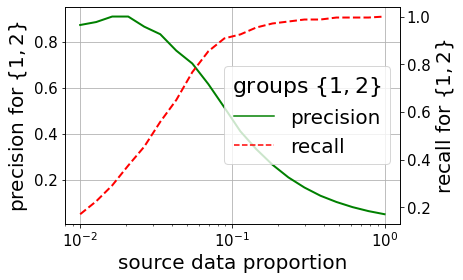

In [4]:
source_weight = np.array(results_ExTRA['source-weights'], dtype = np.float32)

prop = np.logspace(-2, 0, num = 20)
precision = np.zeros(shape = (prop.shape[0], ))
recall = np.zeros(shape = (prop.shape[0], ))


_, group_counts = np.unique(train_g, return_counts=True)

def in_count(train_gi, target_env):
    count = 0
    for g in train_gi:
        for gi in target_env:
            if g == gi:
                count += 1
    return count

def group_count(train_gi):
    count = 0
    for g in train_gi:
        for gi in range(4):
            if g == gi:
                count += 1
    return count


total_count = in_count(train_g, target_env)

for i in range(prop.shape[0]):
    j = int((prop[i]) * train_g.shape[0])
    weights_argsort = source_weight.argsort()
    weights_i = weights_argsort[-j:]
    train_gi = train_g[weights_i]
    train_yi = train_y[weights_i]
    count_i = in_count(train_gi, target_env)
    precision[i] = count_i / train_gi.shape[0]
    recall[i] = count_i / total_count

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
labelsize = 20
ticksize =15
fig, ax1 = plt.subplots()
lw = 2


ax1.plot(prop, precision, color = 'green', marker = '', linestyle='-', linewidth = lw)
ax2 = ax1.twinx() 
ax2.errorbar(prop, recall, color = 'red', marker = '', linestyle='--', linewidth = lw)
labels = ['precision', 'recall', ]
lines = [
    Line2D([0], [0], color = 'green', linestyle = '-'), 
    Line2D([0], [0], color = 'red', linestyle = '--'),
    ]

ax1.set_ylabel('precision for ' + r'$\{1, 2\}$', fontsize = labelsize)
ax2.set_ylabel('recall for ' + r'$\{1, 2\}$', fontsize = labelsize)
ax1.set_xlabel('source data proportion', fontsize = labelsize)
ax1.legend(lines, labels, loc = 7, fontsize = labelsize, title = r'groups $\{1, 2\}$', title_fontsize = labelsize + 2)
ax1.set_xscale('log')
ax1.tick_params('both', labelsize = ticksize)
ax2.tick_params('both', labelsize = ticksize)
ax1.grid()

## Model validation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import itertools

from scipy.stats import spearmanr
source_weight = np.array(results_ExTRA['source-weights'], dtype = np.float32)
tr_x, ts_x, tr_y, ts_y, tr_g, ts_g, tr_w, ts_w\
        = train_test_split(train_x, train_y, train_g, source_weight, random_state=0, test_size=0.5)

grid = list(itertools.product(['l1', 'l2'], np.logspace(-4, -1, 4)))

models = []
for penalty, C in grid:
    lr = LogisticRegression(penalty=penalty, C = C, solver='liblinear').fit(ts_x, ts_y)
    models.append(lr)
    

for penalty, C in grid:
    lr = LogisticRegression(penalty=penalty, C = C, solver='liblinear', class_weight='balanced').fit(ts_x, ts_y)
    models.append(lr)
    
weight_group = 1/np.unique(ts_g, return_counts=True)[1]
weights_gr = np.zeros_like(ts_g)
for i, w in enumerate(weight_group):
    weights_gr = weights_gr +  (ts_g == i).astype('float') * w

for penalty, C in grid:
    lr = LogisticRegression(penalty=penalty, C = C, solver='liblinear').fit(ts_x, ts_y, sample_weight=weights_gr)
    models.append(lr)
    
def validation(model, Tts_x):
    """
    Model validation with
    Garg et al. (2022) "Leveraging unlabeled data to predict out-of-distribution performance"
    """
    p = model.predict_proba(tr_x)
    neg_entropy_s = (p * np.log(p)).sum(axis = 1)
    err = 1 - model.score(tr_x, tr_y)
    quantile = np.quantile(neg_entropy_s, err)
    p = model.predict_proba(Tts_x)
    neg_entropy_t = (p * np.log(p)).sum(axis = 1)
    return (neg_entropy_t > quantile).mean()
    
acc_source = np.zeros(shape = (len(models), ))
acc_source_wt = np.zeros(shape = (len(models), ))
acc_target = np.zeros(shape = (len(models), ))
acc_threshold = np.zeros(shape = (len(models), ))



for i, model in enumerate(models):
        
    

    acc_target[i] = model.score(Tts_x, Tts_y)
    acc_source_wt[i] = model.score(tr_x, tr_y, sample_weight=tr_w)
    acc_source[i] = model.score(tr_x, tr_y)
    acc_threshold[i] = validation(model, ts_x)
    
    
best_acc = np.zeros(shape = (3, ))
rank_correlations = np.zeros(shape = (3, ))
best_acc[0] = acc_target[acc_source_wt.argmax()]
best_acc[1] = acc_target[acc_source.argmax()]
best_acc[2] = acc_target[acc_threshold.argmax()]
rank_correlations[0], _ = spearmanr(acc_target, acc_source_wt)
rank_correlations[1], _ = spearmanr(acc_target, acc_source)
rank_correlations[2], _ = spearmanr(acc_target, acc_threshold)

print('Best target accuracy')
print('  ExTRA:', best_acc[0])
print('  ScrVal:', best_acc[1])
print('  ACT-NE:', best_acc[2])
print('\n')
print('Rank correlation between target accuracy vs ...')
print('  ExTRA:', rank_correlations[0])
print('  ScrVal:', rank_correlations[1])
print('  ACT-NE:', rank_correlations[2])


Best target accuracy
  ExTRA: 0.8317073170731707
  ScrVal: 0.6073170731707317
  ACT-NE: 0.6292682926829268


Rank correlation between target accuracy vs ...
  ExTRA: 0.9768270944741533
  ScrVal: -0.4550925007159207
  ACT-NE: -0.5323921073639681


## Fine Tuning

### DRO, gDRO

In [6]:
dro = fit_dro(Str_x, Str_y, Str_g, eta = 1e-1,
              batch_size = 500, epochs = 250, lr = 2e-4, ITER = ITER)
gdro, _ = fit_gdro(Str_x, Str_y, Str_g, eta = 1e-1,
                   batch_size = 500, epochs = 300, lr = 2e-4, ITER = ITER)

epoch: 1/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 201.04batch/s, loss=0.428]


epoch: 2/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 199.61batch/s, loss=0.363]


epoch: 3/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 199.21batch/s, loss=0.314]


epoch: 4/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 203.11batch/s, loss=0.277]


epoch: 5/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 196.49batch/s, loss=0.244]


epoch: 6/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 202.49batch/s, loss=0.217]


epoch: 7/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 200.90batch/s, loss=0.197]


epoch: 8/250


100%|██████████████████████████████| 9/9 [00:00<00:00, 200.04batch/s, loss=0.18]


epoch: 9/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 201.94batch/s, loss=0.166]


epoch: 10/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 201.33batch/s, loss=0.154]


epoch: 11/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 201.92batch/s, loss=0.144]


epoch: 12/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 168.99batch/s, loss=0.136]


epoch: 13/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 152.89batch/s, loss=0.129]


epoch: 14/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 164.97batch/s, loss=0.123]


epoch: 15/250


100%|██████████████████████████████| 9/9 [00:00<00:00, 59.95batch/s, loss=0.117]


epoch: 16/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.13batch/s, loss=0.113]


epoch: 17/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 198.71batch/s, loss=0.108]


epoch: 18/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 198.02batch/s, loss=0.105]


epoch: 19/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 190.63batch/s, loss=0.101]


epoch: 20/250


100%|████████████████████████████| 9/9 [00:00<00:00, 198.60batch/s, loss=0.0985]


epoch: 21/250


100%|████████████████████████████| 9/9 [00:00<00:00, 192.01batch/s, loss=0.0958]


epoch: 22/250


100%|████████████████████████████| 9/9 [00:00<00:00, 201.50batch/s, loss=0.0934]


epoch: 23/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.81batch/s, loss=0.0912]


epoch: 24/250


100%|████████████████████████████| 9/9 [00:00<00:00, 192.63batch/s, loss=0.0891]


epoch: 25/250


100%|████████████████████████████| 9/9 [00:00<00:00, 199.02batch/s, loss=0.0873]


epoch: 26/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.02batch/s, loss=0.0855]


epoch: 27/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.33batch/s, loss=0.0839]


epoch: 28/250


100%|████████████████████████████| 9/9 [00:00<00:00, 199.64batch/s, loss=0.0825]


epoch: 29/250


100%|████████████████████████████| 9/9 [00:00<00:00, 199.11batch/s, loss=0.0811]


epoch: 30/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.14batch/s, loss=0.0798]


epoch: 31/250


100%|████████████████████████████| 9/9 [00:00<00:00, 200.17batch/s, loss=0.0785]


epoch: 32/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.76batch/s, loss=0.0774]


epoch: 33/250


100%|████████████████████████████| 9/9 [00:00<00:00, 194.82batch/s, loss=0.0763]


epoch: 34/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.27batch/s, loss=0.0753]


epoch: 35/250


100%|████████████████████████████| 9/9 [00:00<00:00, 199.38batch/s, loss=0.0743]


epoch: 36/250


100%|████████████████████████████| 9/9 [00:00<00:00, 192.59batch/s, loss=0.0734]


epoch: 37/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.90batch/s, loss=0.0725]


epoch: 38/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.60batch/s, loss=0.0717]


epoch: 39/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.99batch/s, loss=0.0709]


epoch: 40/250


100%|████████████████████████████| 9/9 [00:00<00:00, 198.53batch/s, loss=0.0701]


epoch: 41/250


100%|████████████████████████████| 9/9 [00:00<00:00, 199.86batch/s, loss=0.0694]


epoch: 42/250


100%|████████████████████████████| 9/9 [00:00<00:00, 198.24batch/s, loss=0.0687]


epoch: 43/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 198.71batch/s, loss=0.068]


epoch: 44/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.73batch/s, loss=0.0674]


epoch: 45/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.43batch/s, loss=0.0668]


epoch: 46/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.49batch/s, loss=0.0662]


epoch: 47/250


100%|████████████████████████████| 9/9 [00:00<00:00, 193.10batch/s, loss=0.0656]


epoch: 48/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 193.92batch/s, loss=0.065]


epoch: 49/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.53batch/s, loss=0.0645]


epoch: 50/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 196.73batch/s, loss=0.064]


epoch: 51/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.88batch/s, loss=0.0635]


epoch: 52/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 195.20batch/s, loss=0.063]


epoch: 53/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.69batch/s, loss=0.0625]


epoch: 54/250


100%|████████████████████████████| 9/9 [00:00<00:00, 187.19batch/s, loss=0.0621]


epoch: 55/250


100%|████████████████████████████| 9/9 [00:00<00:00, 190.76batch/s, loss=0.0616]


epoch: 56/250


100%|████████████████████████████| 9/9 [00:00<00:00, 202.94batch/s, loss=0.0612]


epoch: 57/250


100%|████████████████████████████| 9/9 [00:00<00:00, 194.69batch/s, loss=0.0608]


epoch: 58/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.42batch/s, loss=0.0604]


epoch: 59/250


100%|██████████████████████████████| 9/9 [00:00<00:00, 195.67batch/s, loss=0.06]


epoch: 60/250


100%|████████████████████████████| 9/9 [00:00<00:00, 180.00batch/s, loss=0.0596]


epoch: 61/250


100%|████████████████████████████| 9/9 [00:00<00:00, 192.85batch/s, loss=0.0592]


epoch: 62/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.75batch/s, loss=0.0588]


epoch: 63/250


100%|████████████████████████████| 9/9 [00:00<00:00, 181.81batch/s, loss=0.0585]


epoch: 64/250


100%|████████████████████████████| 9/9 [00:00<00:00, 194.86batch/s, loss=0.0581]


epoch: 65/250


100%|████████████████████████████| 9/9 [00:00<00:00, 179.63batch/s, loss=0.0578]


epoch: 66/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.98batch/s, loss=0.0574]


epoch: 67/250


100%|████████████████████████████| 9/9 [00:00<00:00, 186.27batch/s, loss=0.0571]


epoch: 68/250


100%|████████████████████████████| 9/9 [00:00<00:00, 189.48batch/s, loss=0.0568]


epoch: 69/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.27batch/s, loss=0.0565]


epoch: 70/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 60.03batch/s, loss=0.0562]


epoch: 71/250


100%|████████████████████████████| 9/9 [00:00<00:00, 190.83batch/s, loss=0.0559]


epoch: 72/250


100%|████████████████████████████| 9/9 [00:00<00:00, 185.07batch/s, loss=0.0556]


epoch: 73/250


100%|████████████████████████████| 9/9 [00:00<00:00, 175.74batch/s, loss=0.0553]


epoch: 74/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 183.97batch/s, loss=0.055]


epoch: 75/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.28batch/s, loss=0.0547]


epoch: 76/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.98batch/s, loss=0.0545]


epoch: 77/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.45batch/s, loss=0.0542]


epoch: 78/250


100%|████████████████████████████| 9/9 [00:00<00:00, 190.29batch/s, loss=0.0539]


epoch: 79/250


100%|████████████████████████████| 9/9 [00:00<00:00, 190.96batch/s, loss=0.0537]


epoch: 80/250


100%|████████████████████████████| 9/9 [00:00<00:00, 181.62batch/s, loss=0.0534]


epoch: 81/250


100%|████████████████████████████| 9/9 [00:00<00:00, 176.62batch/s, loss=0.0532]


epoch: 82/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 178.85batch/s, loss=0.053]


epoch: 83/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.85batch/s, loss=0.0527]


epoch: 84/250


100%|████████████████████████████| 9/9 [00:00<00:00, 194.57batch/s, loss=0.0525]


epoch: 85/250


100%|████████████████████████████| 9/9 [00:00<00:00, 193.34batch/s, loss=0.0523]


epoch: 86/250


100%|████████████████████████████| 9/9 [00:00<00:00, 194.80batch/s, loss=0.0521]


epoch: 87/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.81batch/s, loss=0.0518]


epoch: 88/250


100%|████████████████████████████| 9/9 [00:00<00:00, 192.91batch/s, loss=0.0516]


epoch: 89/250


100%|████████████████████████████| 9/9 [00:00<00:00, 193.79batch/s, loss=0.0514]


epoch: 90/250


100%|████████████████████████████| 9/9 [00:00<00:00, 194.32batch/s, loss=0.0512]


epoch: 91/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 196.55batch/s, loss=0.051]


epoch: 92/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.02batch/s, loss=0.0508]


epoch: 93/250


100%|████████████████████████████| 9/9 [00:00<00:00, 193.89batch/s, loss=0.0506]


epoch: 94/250


100%|████████████████████████████| 9/9 [00:00<00:00, 122.64batch/s, loss=0.0504]


epoch: 95/250


100%|████████████████████████████| 9/9 [00:00<00:00, 189.56batch/s, loss=0.0502]


epoch: 96/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.29batch/s, loss=0.0501]


epoch: 97/250


100%|████████████████████████████| 9/9 [00:00<00:00, 198.11batch/s, loss=0.0499]


epoch: 98/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.55batch/s, loss=0.0497]


epoch: 99/250


100%|████████████████████████████| 9/9 [00:00<00:00, 200.03batch/s, loss=0.0495]


epoch: 100/250


100%|████████████████████████████| 9/9 [00:00<00:00, 199.19batch/s, loss=0.0493]


group 0 acc 0.9930621255124567
group 1 acc 0.7421383647798742
group 2 acc 0.4807692307692308
group 3 acc 0.9239013933547695
epoch: 101/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.58batch/s, loss=0.0492]


epoch: 102/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 194.33batch/s, loss=0.049]


epoch: 103/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.86batch/s, loss=0.0488]


epoch: 104/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.76batch/s, loss=0.0487]


epoch: 105/250


100%|████████████████████████████| 9/9 [00:00<00:00, 190.56batch/s, loss=0.0485]


epoch: 106/250


100%|████████████████████████████| 9/9 [00:00<00:00, 193.91batch/s, loss=0.0484]


epoch: 107/250


100%|████████████████████████████| 9/9 [00:00<00:00, 183.27batch/s, loss=0.0482]


epoch: 108/250


100%|████████████████████████████| 9/9 [00:00<00:00, 162.92batch/s, loss=0.0481]


epoch: 109/250


100%|████████████████████████████| 9/9 [00:00<00:00, 184.81batch/s, loss=0.0479]


epoch: 110/250


100%|████████████████████████████| 9/9 [00:00<00:00, 182.48batch/s, loss=0.0478]


epoch: 111/250


100%|████████████████████████████| 9/9 [00:00<00:00, 178.97batch/s, loss=0.0476]


epoch: 112/250


100%|████████████████████████████| 9/9 [00:00<00:00, 182.49batch/s, loss=0.0475]


epoch: 113/250


100%|████████████████████████████| 9/9 [00:00<00:00, 181.90batch/s, loss=0.0474]


epoch: 114/250


100%|████████████████████████████| 9/9 [00:00<00:00, 181.37batch/s, loss=0.0472]


epoch: 115/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.46batch/s, loss=0.0471]


epoch: 116/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.49batch/s, loss=0.0469]


epoch: 117/250


100%|████████████████████████████| 9/9 [00:00<00:00, 195.77batch/s, loss=0.0468]


epoch: 118/250


100%|████████████████████████████| 9/9 [00:00<00:00, 197.14batch/s, loss=0.0467]


epoch: 119/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.19batch/s, loss=0.0466]


epoch: 120/250


100%|████████████████████████████| 9/9 [00:00<00:00, 192.12batch/s, loss=0.0464]


epoch: 121/250


100%|████████████████████████████| 9/9 [00:00<00:00, 186.19batch/s, loss=0.0463]


epoch: 122/250


100%|████████████████████████████| 9/9 [00:00<00:00, 184.28batch/s, loss=0.0462]


epoch: 123/250


100%|████████████████████████████| 9/9 [00:00<00:00, 183.46batch/s, loss=0.0461]


epoch: 124/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 58.69batch/s, loss=0.0459]


epoch: 125/250


100%|████████████████████████████| 9/9 [00:00<00:00, 184.30batch/s, loss=0.0458]


epoch: 126/250


100%|████████████████████████████| 9/9 [00:00<00:00, 185.97batch/s, loss=0.0457]


epoch: 127/250


100%|████████████████████████████| 9/9 [00:00<00:00, 183.24batch/s, loss=0.0456]


epoch: 128/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.57batch/s, loss=0.0455]


epoch: 129/250


100%|████████████████████████████| 9/9 [00:00<00:00, 196.46batch/s, loss=0.0454]


epoch: 130/250


100%|████████████████████████████| 9/9 [00:00<00:00, 191.39batch/s, loss=0.0453]


epoch: 131/250


100%|████████████████████████████| 9/9 [00:00<00:00, 190.08batch/s, loss=0.0451]


epoch: 132/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 185.19batch/s, loss=0.045]


epoch: 133/250


100%|████████████████████████████| 9/9 [00:00<00:00, 182.40batch/s, loss=0.0449]


epoch: 134/250


100%|████████████████████████████| 9/9 [00:00<00:00, 180.83batch/s, loss=0.0448]


epoch: 135/250


100%|████████████████████████████| 9/9 [00:00<00:00, 183.02batch/s, loss=0.0447]


epoch: 136/250


100%|████████████████████████████| 9/9 [00:00<00:00, 181.24batch/s, loss=0.0446]


epoch: 137/250


100%|████████████████████████████| 9/9 [00:00<00:00, 184.07batch/s, loss=0.0445]


epoch: 138/250


100%|████████████████████████████| 9/9 [00:00<00:00, 186.38batch/s, loss=0.0444]


epoch: 139/250


100%|████████████████████████████| 9/9 [00:00<00:00, 185.97batch/s, loss=0.0443]


epoch: 140/250


100%|████████████████████████████| 9/9 [00:00<00:00, 172.00batch/s, loss=0.0442]


epoch: 141/250


100%|████████████████████████████| 9/9 [00:00<00:00, 169.83batch/s, loss=0.0441]


epoch: 142/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 173.74batch/s, loss=0.044]


epoch: 143/250


100%|████████████████████████████| 9/9 [00:00<00:00, 176.64batch/s, loss=0.0439]


epoch: 144/250


100%|████████████████████████████| 9/9 [00:00<00:00, 168.82batch/s, loss=0.0438]


epoch: 145/250


100%|████████████████████████████| 9/9 [00:00<00:00, 167.58batch/s, loss=0.0437]


epoch: 146/250


100%|████████████████████████████| 9/9 [00:00<00:00, 167.75batch/s, loss=0.0436]


epoch: 147/250


100%|████████████████████████████| 9/9 [00:00<00:00, 170.46batch/s, loss=0.0436]


epoch: 148/250


100%|████████████████████████████| 9/9 [00:00<00:00, 158.16batch/s, loss=0.0435]


epoch: 149/250


100%|████████████████████████████| 9/9 [00:00<00:00, 167.19batch/s, loss=0.0434]


epoch: 150/250


100%|████████████████████████████| 9/9 [00:00<00:00, 168.01batch/s, loss=0.0433]


epoch: 151/250


100%|████████████████████████████| 9/9 [00:00<00:00, 169.47batch/s, loss=0.0432]


epoch: 152/250


100%|████████████████████████████| 9/9 [00:00<00:00, 172.19batch/s, loss=0.0431]


epoch: 153/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 159.39batch/s, loss=0.043]


epoch: 154/250


100%|████████████████████████████| 9/9 [00:00<00:00, 150.51batch/s, loss=0.0429]


epoch: 155/250


100%|████████████████████████████| 9/9 [00:00<00:00, 167.22batch/s, loss=0.0429]


epoch: 156/250


100%|████████████████████████████| 9/9 [00:00<00:00, 172.17batch/s, loss=0.0428]


epoch: 157/250


100%|████████████████████████████| 9/9 [00:00<00:00, 175.21batch/s, loss=0.0427]


epoch: 158/250


100%|████████████████████████████| 9/9 [00:00<00:00, 168.61batch/s, loss=0.0426]


epoch: 159/250


100%|████████████████████████████| 9/9 [00:00<00:00, 171.43batch/s, loss=0.0425]


epoch: 160/250


100%|████████████████████████████| 9/9 [00:00<00:00, 169.03batch/s, loss=0.0425]


epoch: 161/250


100%|████████████████████████████| 9/9 [00:00<00:00, 174.01batch/s, loss=0.0424]


epoch: 162/250


100%|████████████████████████████| 9/9 [00:00<00:00, 170.51batch/s, loss=0.0423]


epoch: 163/250


100%|████████████████████████████| 9/9 [00:00<00:00, 156.58batch/s, loss=0.0422]


epoch: 164/250


100%|████████████████████████████| 9/9 [00:00<00:00, 151.64batch/s, loss=0.0422]


epoch: 165/250


100%|████████████████████████████| 9/9 [00:00<00:00, 122.21batch/s, loss=0.0421]


epoch: 166/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.46batch/s, loss=0.042]


epoch: 167/250


100%|████████████████████████████| 9/9 [00:00<00:00, 123.61batch/s, loss=0.0419]


epoch: 168/250


100%|████████████████████████████| 9/9 [00:00<00:00, 142.05batch/s, loss=0.0419]


epoch: 169/250


100%|████████████████████████████| 9/9 [00:00<00:00, 145.27batch/s, loss=0.0418]


epoch: 170/250


100%|████████████████████████████| 9/9 [00:00<00:00, 145.21batch/s, loss=0.0417]


epoch: 171/250


100%|████████████████████████████| 9/9 [00:00<00:00, 150.94batch/s, loss=0.0416]


epoch: 172/250


100%|████████████████████████████| 9/9 [00:00<00:00, 150.11batch/s, loss=0.0416]


epoch: 173/250


100%|████████████████████████████| 9/9 [00:00<00:00, 105.93batch/s, loss=0.0415]


epoch: 174/250


100%|████████████████████████████| 9/9 [00:00<00:00, 123.22batch/s, loss=0.0414]


epoch: 175/250


100%|████████████████████████████| 9/9 [00:00<00:00, 160.17batch/s, loss=0.0414]


epoch: 176/250


100%|████████████████████████████| 9/9 [00:00<00:00, 163.76batch/s, loss=0.0413]


epoch: 177/250


100%|████████████████████████████| 9/9 [00:00<00:00, 161.32batch/s, loss=0.0412]


epoch: 178/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 51.85batch/s, loss=0.0412]


epoch: 179/250


100%|████████████████████████████| 9/9 [00:00<00:00, 129.26batch/s, loss=0.0411]


epoch: 180/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 151.06batch/s, loss=0.041]


epoch: 181/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 154.45batch/s, loss=0.041]


epoch: 182/250


100%|████████████████████████████| 9/9 [00:00<00:00, 158.06batch/s, loss=0.0409]


epoch: 183/250


100%|████████████████████████████| 9/9 [00:00<00:00, 146.62batch/s, loss=0.0408]


epoch: 184/250


100%|████████████████████████████| 9/9 [00:00<00:00, 146.31batch/s, loss=0.0408]


epoch: 185/250


100%|████████████████████████████| 9/9 [00:00<00:00, 132.67batch/s, loss=0.0407]


epoch: 186/250


100%|████████████████████████████| 9/9 [00:00<00:00, 147.37batch/s, loss=0.0406]


epoch: 187/250


100%|████████████████████████████| 9/9 [00:00<00:00, 147.96batch/s, loss=0.0406]


epoch: 188/250


100%|████████████████████████████| 9/9 [00:00<00:00, 149.75batch/s, loss=0.0405]


epoch: 189/250


100%|████████████████████████████| 9/9 [00:00<00:00, 142.76batch/s, loss=0.0405]


epoch: 190/250


100%|████████████████████████████| 9/9 [00:00<00:00, 139.59batch/s, loss=0.0404]


epoch: 191/250


100%|████████████████████████████| 9/9 [00:00<00:00, 133.79batch/s, loss=0.0403]


epoch: 192/250


100%|████████████████████████████| 9/9 [00:00<00:00, 139.06batch/s, loss=0.0403]


epoch: 193/250


100%|████████████████████████████| 9/9 [00:00<00:00, 127.84batch/s, loss=0.0402]


epoch: 194/250


100%|████████████████████████████| 9/9 [00:00<00:00, 149.77batch/s, loss=0.0402]


epoch: 195/250


100%|████████████████████████████| 9/9 [00:00<00:00, 128.32batch/s, loss=0.0401]


epoch: 196/250


100%|██████████████████████████████| 9/9 [00:00<00:00, 151.60batch/s, loss=0.04]


epoch: 197/250


100%|██████████████████████████████| 9/9 [00:00<00:00, 136.32batch/s, loss=0.04]


epoch: 198/250


100%|████████████████████████████| 9/9 [00:00<00:00, 146.81batch/s, loss=0.0399]


epoch: 199/250


100%|████████████████████████████| 9/9 [00:00<00:00, 143.11batch/s, loss=0.0399]


epoch: 200/250


100%|████████████████████████████| 9/9 [00:00<00:00, 131.11batch/s, loss=0.0398]


group 0 acc 0.9940081993062125
group 1 acc 0.7547169811320755
group 2 acc 0.5769230769230769
group 3 acc 0.9431939978563773
epoch: 201/250


100%|████████████████████████████| 9/9 [00:00<00:00, 147.56batch/s, loss=0.0398]


epoch: 202/250


100%|████████████████████████████| 9/9 [00:00<00:00, 129.71batch/s, loss=0.0397]


epoch: 203/250


100%|████████████████████████████| 9/9 [00:00<00:00, 141.49batch/s, loss=0.0396]


epoch: 204/250


100%|████████████████████████████| 9/9 [00:00<00:00, 131.85batch/s, loss=0.0396]


epoch: 205/250


100%|████████████████████████████| 9/9 [00:00<00:00, 126.08batch/s, loss=0.0395]


epoch: 206/250


100%|████████████████████████████| 9/9 [00:00<00:00, 131.90batch/s, loss=0.0395]


epoch: 207/250


100%|████████████████████████████| 9/9 [00:00<00:00, 140.98batch/s, loss=0.0394]


epoch: 208/250


100%|████████████████████████████| 9/9 [00:00<00:00, 144.57batch/s, loss=0.0394]


epoch: 209/250


100%|████████████████████████████| 9/9 [00:00<00:00, 128.46batch/s, loss=0.0393]


epoch: 210/250


100%|████████████████████████████| 9/9 [00:00<00:00, 147.05batch/s, loss=0.0393]


epoch: 211/250


100%|████████████████████████████| 9/9 [00:00<00:00, 126.18batch/s, loss=0.0392]


epoch: 212/250


100%|████████████████████████████| 9/9 [00:00<00:00, 140.44batch/s, loss=0.0392]


epoch: 213/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 80.67batch/s, loss=0.0391]


epoch: 214/250


100%|████████████████████████████| 9/9 [00:00<00:00, 144.90batch/s, loss=0.0391]


epoch: 215/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.21batch/s, loss=0.039]


epoch: 216/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 143.50batch/s, loss=0.039]


epoch: 217/250


100%|████████████████████████████| 9/9 [00:00<00:00, 128.76batch/s, loss=0.0389]


epoch: 218/250


100%|████████████████████████████| 9/9 [00:00<00:00, 138.73batch/s, loss=0.0389]


epoch: 219/250


100%|████████████████████████████| 9/9 [00:00<00:00, 114.94batch/s, loss=0.0388]


epoch: 220/250


100%|████████████████████████████| 9/9 [00:00<00:00, 129.32batch/s, loss=0.0388]


epoch: 221/250


100%|████████████████████████████| 9/9 [00:00<00:00, 145.43batch/s, loss=0.0387]


epoch: 222/250


100%|████████████████████████████| 9/9 [00:00<00:00, 144.56batch/s, loss=0.0387]


epoch: 223/250


100%|████████████████████████████| 9/9 [00:00<00:00, 142.88batch/s, loss=0.0386]


epoch: 224/250


100%|████████████████████████████| 9/9 [00:00<00:00, 126.57batch/s, loss=0.0386]


epoch: 225/250


100%|████████████████████████████| 9/9 [00:00<00:00, 122.12batch/s, loss=0.0385]


epoch: 226/250


100%|████████████████████████████| 9/9 [00:00<00:00, 123.50batch/s, loss=0.0385]


epoch: 227/250


100%|████████████████████████████| 9/9 [00:00<00:00, 145.76batch/s, loss=0.0384]


epoch: 228/250


100%|████████████████████████████| 9/9 [00:00<00:00, 138.31batch/s, loss=0.0384]


epoch: 229/250


100%|████████████████████████████| 9/9 [00:00<00:00, 141.37batch/s, loss=0.0383]


epoch: 230/250


100%|████████████████████████████| 9/9 [00:00<00:00, 145.39batch/s, loss=0.0383]


epoch: 231/250


100%|████████████████████████████| 9/9 [00:00<00:00, 127.14batch/s, loss=0.0382]


epoch: 232/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 49.56batch/s, loss=0.0382]


epoch: 233/250


100%|████████████████████████████| 9/9 [00:00<00:00, 148.71batch/s, loss=0.0381]


epoch: 234/250


100%|████████████████████████████| 9/9 [00:00<00:00, 153.82batch/s, loss=0.0381]


epoch: 235/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 158.76batch/s, loss=0.038]


epoch: 236/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 147.00batch/s, loss=0.038]


epoch: 237/250


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.59batch/s, loss=0.038]


epoch: 238/250


100%|████████████████████████████| 9/9 [00:00<00:00, 152.35batch/s, loss=0.0379]


epoch: 239/250


100%|████████████████████████████| 9/9 [00:00<00:00, 150.88batch/s, loss=0.0379]


epoch: 240/250


100%|████████████████████████████| 9/9 [00:00<00:00, 162.99batch/s, loss=0.0378]


epoch: 241/250


100%|████████████████████████████| 9/9 [00:00<00:00, 161.49batch/s, loss=0.0378]


epoch: 242/250


100%|████████████████████████████| 9/9 [00:00<00:00, 170.80batch/s, loss=0.0377]


epoch: 243/250


100%|████████████████████████████| 9/9 [00:00<00:00, 169.92batch/s, loss=0.0377]


epoch: 244/250


100%|████████████████████████████| 9/9 [00:00<00:00, 171.87batch/s, loss=0.0377]


epoch: 245/250


100%|████████████████████████████| 9/9 [00:00<00:00, 164.33batch/s, loss=0.0376]


epoch: 246/250


100%|████████████████████████████| 9/9 [00:00<00:00, 166.00batch/s, loss=0.0376]


epoch: 247/250


100%|████████████████████████████| 9/9 [00:00<00:00, 169.99batch/s, loss=0.0375]


epoch: 248/250


100%|████████████████████████████| 9/9 [00:00<00:00, 175.06batch/s, loss=0.0375]


epoch: 249/250


100%|████████████████████████████| 9/9 [00:00<00:00, 178.59batch/s, loss=0.0374]


epoch: 250/250


100%|████████████████████████████| 9/9 [00:00<00:00, 173.03batch/s, loss=0.0374]


epoch: 1/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.29batch/s, loss=0.463]


epoch: 2/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 122.05batch/s, loss=0.535]


epoch: 3/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 122.08batch/s, loss=0.575]


epoch: 4/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.67batch/s, loss=0.592]


epoch: 5/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.88batch/s, loss=0.592]


epoch: 6/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 119.98batch/s, loss=0.587]


epoch: 7/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.82batch/s, loss=0.582]


epoch: 8/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 99.27batch/s, loss=0.574]


epoch: 9/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.04batch/s, loss=0.564]


epoch: 10/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.38batch/s, loss=0.557]


epoch: 11/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 122.45batch/s, loss=0.551]


epoch: 12/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.59batch/s, loss=0.543]


epoch: 13/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.48batch/s, loss=0.536]


epoch: 14/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 116.51batch/s, loss=0.53]


epoch: 15/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.67batch/s, loss=0.524]


epoch: 16/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.33batch/s, loss=0.518]


epoch: 17/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.38batch/s, loss=0.513]


epoch: 18/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.93batch/s, loss=0.508]


epoch: 19/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 48.19batch/s, loss=0.503]


epoch: 20/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.80batch/s, loss=0.497]


epoch: 21/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.52batch/s, loss=0.492]


epoch: 22/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.59batch/s, loss=0.488]


epoch: 23/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.92batch/s, loss=0.483]


epoch: 24/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.42batch/s, loss=0.478]


epoch: 25/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.28batch/s, loss=0.474]


epoch: 26/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.71batch/s, loss=0.469]


epoch: 27/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.95batch/s, loss=0.465]


epoch: 28/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.63batch/s, loss=0.461]


epoch: 29/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.43batch/s, loss=0.457]


epoch: 30/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.33batch/s, loss=0.453]


epoch: 31/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.39batch/s, loss=0.449]


epoch: 32/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.07batch/s, loss=0.446]


epoch: 33/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.54batch/s, loss=0.442]


epoch: 34/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.19batch/s, loss=0.439]


epoch: 35/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.72batch/s, loss=0.435]


epoch: 36/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.14batch/s, loss=0.432]


epoch: 37/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.08batch/s, loss=0.429]


epoch: 38/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.46batch/s, loss=0.426]


epoch: 39/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.18batch/s, loss=0.423]


epoch: 40/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 129.00batch/s, loss=0.42]


epoch: 41/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.39batch/s, loss=0.417]


epoch: 42/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.78batch/s, loss=0.414]


epoch: 43/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.25batch/s, loss=0.411]


epoch: 44/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.77batch/s, loss=0.408]


epoch: 45/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 116.63batch/s, loss=0.405]


epoch: 46/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 47.93batch/s, loss=0.403]


epoch: 47/300


100%|███████████████████████████████| 9/9 [00:00<00:00, 120.14batch/s, loss=0.4]


epoch: 48/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.30batch/s, loss=0.397]


epoch: 49/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.68batch/s, loss=0.395]


epoch: 50/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.70batch/s, loss=0.392]


epoch: 51/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.19batch/s, loss=0.389]


epoch: 52/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.88batch/s, loss=0.386]


epoch: 53/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.94batch/s, loss=0.384]


epoch: 54/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.67batch/s, loss=0.381]


epoch: 55/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.61batch/s, loss=0.378]


epoch: 56/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.70batch/s, loss=0.376]


epoch: 57/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.53batch/s, loss=0.373]


epoch: 58/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.85batch/s, loss=0.371]


epoch: 59/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.85batch/s, loss=0.368]


epoch: 60/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.61batch/s, loss=0.365]


epoch: 61/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.23batch/s, loss=0.363]


epoch: 62/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 129.38batch/s, loss=0.36]


epoch: 63/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.36batch/s, loss=0.358]


epoch: 64/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.38batch/s, loss=0.355]


epoch: 65/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.32batch/s, loss=0.353]


epoch: 66/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.66batch/s, loss=0.351]


epoch: 67/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.51batch/s, loss=0.348]


epoch: 68/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.00batch/s, loss=0.346]


epoch: 69/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.87batch/s, loss=0.344]


epoch: 70/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.89batch/s, loss=0.341]


epoch: 71/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.22batch/s, loss=0.339]


epoch: 72/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.70batch/s, loss=0.337]


epoch: 73/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.88batch/s, loss=0.335]


epoch: 74/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 52.40batch/s, loss=0.333]


epoch: 75/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 106.07batch/s, loss=0.331]


epoch: 76/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.73batch/s, loss=0.329]


epoch: 77/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.38batch/s, loss=0.327]


epoch: 78/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.42batch/s, loss=0.325]


epoch: 79/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.15batch/s, loss=0.323]


epoch: 80/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.51batch/s, loss=0.321]


epoch: 81/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 101.88batch/s, loss=0.319]


epoch: 82/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.79batch/s, loss=0.317]


epoch: 83/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.29batch/s, loss=0.315]


epoch: 84/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 99.76batch/s, loss=0.314]


epoch: 85/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 111.71batch/s, loss=0.312]


epoch: 86/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 117.53batch/s, loss=0.31]


epoch: 87/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.36batch/s, loss=0.309]


epoch: 88/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.20batch/s, loss=0.307]


epoch: 89/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 122.25batch/s, loss=0.305]


epoch: 90/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.50batch/s, loss=0.304]


epoch: 91/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.12batch/s, loss=0.302]


epoch: 92/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.25batch/s, loss=0.301]


epoch: 93/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.17batch/s, loss=0.299]


epoch: 94/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.19batch/s, loss=0.298]


epoch: 95/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.53batch/s, loss=0.296]


epoch: 96/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.46batch/s, loss=0.295]


epoch: 97/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.20batch/s, loss=0.294]


epoch: 98/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.85batch/s, loss=0.292]


epoch: 99/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.61batch/s, loss=0.291]


epoch: 100/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 130.62batch/s, loss=0.29]


group 0 acc 0.9120151371807
group 1 acc 0.9308176100628931
group 2 acc 0.9423076923076923
group 3 acc 0.9142550911039657
epoch: 101/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.19batch/s, loss=0.289]


epoch: 102/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 50.47batch/s, loss=0.287]


epoch: 103/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.31batch/s, loss=0.286]


epoch: 104/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.89batch/s, loss=0.285]


epoch: 105/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.26batch/s, loss=0.284]


epoch: 106/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.67batch/s, loss=0.283]


epoch: 107/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.07batch/s, loss=0.282]


epoch: 108/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.89batch/s, loss=0.281]


epoch: 109/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 128.46batch/s, loss=0.28]


epoch: 110/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.26batch/s, loss=0.279]


epoch: 111/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.94batch/s, loss=0.278]


epoch: 112/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.65batch/s, loss=0.277]


epoch: 113/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.96batch/s, loss=0.276]


epoch: 114/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.55batch/s, loss=0.275]


epoch: 115/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 98.21batch/s, loss=0.274]


epoch: 116/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.91batch/s, loss=0.273]


epoch: 117/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.45batch/s, loss=0.272]


epoch: 118/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.01batch/s, loss=0.271]


epoch: 119/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 130.12batch/s, loss=0.27]


epoch: 120/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 130.79batch/s, loss=0.27]


epoch: 121/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.43batch/s, loss=0.269]


epoch: 122/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.42batch/s, loss=0.268]


epoch: 123/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.50batch/s, loss=0.267]


epoch: 124/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.77batch/s, loss=0.266]


epoch: 125/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 125.85batch/s, loss=0.266]


epoch: 126/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.65batch/s, loss=0.265]


epoch: 127/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.56batch/s, loss=0.264]


epoch: 128/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 125.57batch/s, loss=0.264]


epoch: 129/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.78batch/s, loss=0.263]


epoch: 130/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 49.53batch/s, loss=0.262]


epoch: 131/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 122.35batch/s, loss=0.262]


epoch: 132/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 121.77batch/s, loss=0.261]


epoch: 133/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 119.31batch/s, loss=0.261]


epoch: 134/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 130.76batch/s, loss=0.26]


epoch: 135/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 132.06batch/s, loss=0.26]


epoch: 136/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.05batch/s, loss=0.259]


epoch: 137/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.48batch/s, loss=0.259]


epoch: 138/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.01batch/s, loss=0.258]


epoch: 139/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.66batch/s, loss=0.258]


epoch: 140/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.70batch/s, loss=0.257]


epoch: 141/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.15batch/s, loss=0.257]


epoch: 142/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.65batch/s, loss=0.256]


epoch: 143/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.86batch/s, loss=0.256]


epoch: 144/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.68batch/s, loss=0.256]


epoch: 145/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.11batch/s, loss=0.255]


epoch: 146/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.83batch/s, loss=0.255]


epoch: 147/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.07batch/s, loss=0.254]


epoch: 148/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 85.29batch/s, loss=0.254]


epoch: 149/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.05batch/s, loss=0.254]


epoch: 150/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.42batch/s, loss=0.253]


epoch: 151/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.82batch/s, loss=0.253]


epoch: 152/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 139.28batch/s, loss=0.253]


epoch: 153/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.10batch/s, loss=0.252]


epoch: 154/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.75batch/s, loss=0.252]


epoch: 155/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.09batch/s, loss=0.252]


epoch: 156/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 99.67batch/s, loss=0.252]


epoch: 157/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 51.40batch/s, loss=0.251]


epoch: 158/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.01batch/s, loss=0.251]


epoch: 159/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.74batch/s, loss=0.251]


epoch: 160/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.41batch/s, loss=0.251]


epoch: 161/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 136.11batch/s, loss=0.25]


epoch: 162/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 137.88batch/s, loss=0.25]


epoch: 163/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 135.49batch/s, loss=0.25]


epoch: 164/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 136.88batch/s, loss=0.25]


epoch: 165/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.51batch/s, loss=0.249]


epoch: 166/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.68batch/s, loss=0.249]


epoch: 167/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.04batch/s, loss=0.249]


epoch: 168/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.34batch/s, loss=0.249]


epoch: 169/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.80batch/s, loss=0.249]


epoch: 170/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.18batch/s, loss=0.248]


epoch: 171/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.28batch/s, loss=0.248]


epoch: 172/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.62batch/s, loss=0.248]


epoch: 173/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.14batch/s, loss=0.248]


epoch: 174/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.48batch/s, loss=0.247]


epoch: 175/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.39batch/s, loss=0.247]


epoch: 176/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.14batch/s, loss=0.247]


epoch: 177/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 121.76batch/s, loss=0.247]


epoch: 178/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.34batch/s, loss=0.247]


epoch: 179/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.07batch/s, loss=0.246]


epoch: 180/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.31batch/s, loss=0.246]


epoch: 181/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 122.07batch/s, loss=0.246]


epoch: 182/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.42batch/s, loss=0.246]


epoch: 183/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.06batch/s, loss=0.245]


epoch: 184/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.74batch/s, loss=0.245]


epoch: 185/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 52.81batch/s, loss=0.245]


epoch: 186/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.00batch/s, loss=0.245]


epoch: 187/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.60batch/s, loss=0.244]


epoch: 188/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.95batch/s, loss=0.244]


epoch: 189/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.35batch/s, loss=0.244]


epoch: 190/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.00batch/s, loss=0.243]


epoch: 191/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.59batch/s, loss=0.243]


epoch: 192/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.60batch/s, loss=0.243]


epoch: 193/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 102.26batch/s, loss=0.242]


epoch: 194/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.39batch/s, loss=0.242]


epoch: 195/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.05batch/s, loss=0.242]


epoch: 196/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.48batch/s, loss=0.241]


epoch: 197/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.33batch/s, loss=0.241]


epoch: 198/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.42batch/s, loss=0.241]


epoch: 199/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 128.13batch/s, loss=0.24]


epoch: 200/300


100%|███████████████████████████████| 9/9 [00:00<00:00, 78.61batch/s, loss=0.24]


group 0 acc 0.9157994323557237
group 1 acc 0.9433962264150944
group 2 acc 0.9230769230769231
group 3 acc 0.9260450160771704
epoch: 201/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 111.94batch/s, loss=0.24]


epoch: 202/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 119.03batch/s, loss=0.239]


epoch: 203/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.02batch/s, loss=0.239]


epoch: 204/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 139.19batch/s, loss=0.238]


epoch: 205/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.35batch/s, loss=0.238]


epoch: 206/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.43batch/s, loss=0.238]


epoch: 207/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.08batch/s, loss=0.237]


epoch: 208/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.52batch/s, loss=0.237]


epoch: 209/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.54batch/s, loss=0.236]


epoch: 210/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.30batch/s, loss=0.236]


epoch: 211/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.63batch/s, loss=0.235]


epoch: 212/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 52.53batch/s, loss=0.235]


epoch: 213/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 138.80batch/s, loss=0.234]


epoch: 214/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.65batch/s, loss=0.234]


epoch: 215/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.24batch/s, loss=0.233]


epoch: 216/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.97batch/s, loss=0.233]


epoch: 217/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.76batch/s, loss=0.233]


epoch: 218/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 121.72batch/s, loss=0.232]


epoch: 219/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.12batch/s, loss=0.232]


epoch: 220/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.20batch/s, loss=0.231]


epoch: 221/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.17batch/s, loss=0.231]


epoch: 222/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 135.58batch/s, loss=0.23]


epoch: 223/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 135.41batch/s, loss=0.23]


epoch: 224/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.53batch/s, loss=0.229]


epoch: 225/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 102.85batch/s, loss=0.228]


epoch: 226/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 137.36batch/s, loss=0.228]


epoch: 227/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.47batch/s, loss=0.227]


epoch: 228/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.80batch/s, loss=0.227]


epoch: 229/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 136.44batch/s, loss=0.226]


epoch: 230/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.97batch/s, loss=0.226]


epoch: 231/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.55batch/s, loss=0.225]


epoch: 232/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.66batch/s, loss=0.225]


epoch: 233/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.09batch/s, loss=0.224]


epoch: 234/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 134.52batch/s, loss=0.224]


epoch: 235/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 130.18batch/s, loss=0.223]


epoch: 236/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.63batch/s, loss=0.223]


epoch: 237/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 132.12batch/s, loss=0.222]


epoch: 238/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.14batch/s, loss=0.222]


epoch: 239/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 135.07batch/s, loss=0.221]


epoch: 240/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 51.66batch/s, loss=0.221]


epoch: 241/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 135.73batch/s, loss=0.22]


epoch: 242/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.90batch/s, loss=0.219]


epoch: 243/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 121.79batch/s, loss=0.219]


epoch: 244/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.44batch/s, loss=0.218]


epoch: 245/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 133.82batch/s, loss=0.218]


epoch: 246/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 127.96batch/s, loss=0.217]


epoch: 247/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 113.67batch/s, loss=0.217]


epoch: 248/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.28batch/s, loss=0.216]


epoch: 249/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 131.43batch/s, loss=0.216]


epoch: 250/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 128.62batch/s, loss=0.215]


epoch: 251/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 129.50batch/s, loss=0.215]


epoch: 252/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.92batch/s, loss=0.214]


epoch: 253/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.06batch/s, loss=0.214]


epoch: 254/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.00batch/s, loss=0.213]


epoch: 255/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.63batch/s, loss=0.213]


epoch: 256/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 94.35batch/s, loss=0.212]


epoch: 257/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.15batch/s, loss=0.212]


epoch: 258/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 121.89batch/s, loss=0.211]


epoch: 259/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 125.92batch/s, loss=0.211]


epoch: 260/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 126.30batch/s, loss=0.21]


epoch: 261/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 126.70batch/s, loss=0.21]


epoch: 262/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 124.58batch/s, loss=0.209]


epoch: 263/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 126.58batch/s, loss=0.209]


epoch: 264/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.55batch/s, loss=0.208]


epoch: 265/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 115.73batch/s, loss=0.208]


epoch: 266/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 114.85batch/s, loss=0.207]


epoch: 267/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 50.87batch/s, loss=0.207]


epoch: 268/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.07batch/s, loss=0.206]


epoch: 269/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.78batch/s, loss=0.206]


epoch: 270/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 117.47batch/s, loss=0.206]


epoch: 271/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.09batch/s, loss=0.205]


epoch: 272/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 112.27batch/s, loss=0.205]


epoch: 273/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 115.20batch/s, loss=0.204]


epoch: 274/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 119.05batch/s, loss=0.204]


epoch: 275/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.14batch/s, loss=0.203]


epoch: 276/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.66batch/s, loss=0.203]


epoch: 277/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.17batch/s, loss=0.202]


epoch: 278/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.70batch/s, loss=0.202]


epoch: 279/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.39batch/s, loss=0.202]


epoch: 280/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.81batch/s, loss=0.201]


epoch: 281/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 116.37batch/s, loss=0.201]


epoch: 282/300


100%|███████████████████████████████| 9/9 [00:00<00:00, 118.43batch/s, loss=0.2]


epoch: 283/300


100%|███████████████████████████████| 9/9 [00:00<00:00, 120.14batch/s, loss=0.2]


epoch: 284/300


100%|███████████████████████████████| 9/9 [00:00<00:00, 121.65batch/s, loss=0.2]


epoch: 285/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.46batch/s, loss=0.199]


epoch: 286/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 87.54batch/s, loss=0.199]


epoch: 287/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 111.45batch/s, loss=0.198]


epoch: 288/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 115.84batch/s, loss=0.198]


epoch: 289/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.72batch/s, loss=0.198]


epoch: 290/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.88batch/s, loss=0.197]


epoch: 291/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 121.92batch/s, loss=0.197]


epoch: 292/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 123.56batch/s, loss=0.197]


epoch: 293/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.37batch/s, loss=0.196]


epoch: 294/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 114.86batch/s, loss=0.196]


epoch: 295/300


100%|██████████████████████████████| 9/9 [00:00<00:00, 44.67batch/s, loss=0.195]


epoch: 296/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 107.11batch/s, loss=0.195]


epoch: 297/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 109.79batch/s, loss=0.195]


epoch: 298/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 118.26batch/s, loss=0.194]


epoch: 299/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 120.18batch/s, loss=0.194]


epoch: 300/300


100%|█████████████████████████████| 9/9 [00:00<00:00, 119.22batch/s, loss=0.194]

group 0 acc 0.9277830337432986
group 1 acc 0.9433962264150944
group 2 acc 0.9230769230769231
group 3 acc 0.9303322615219721


In [7]:
Tts_x_torch = torch.from_numpy(Tts_x).type(torch.float32).to(device)
hat_y = dro(Tts_x_torch).detach().numpy() > 0.5
dro_accuracy = (hat_y == Tts_y).mean()

hat_y = gdro(Tts_x_torch).detach().numpy() > 0.5
gdro_accuracy = (hat_y == Tts_y).mean()

### Results for target environment $\{1, 2\}$

In [8]:
print('Accuracies for')
print(f'  S->T:', results_ExTRA['st'])
print(f'  RW_gr:', results_ExTRA['weighted-acccurcay'])
print(f'  T->T:', results_ExTRA['tt'])
print(f'  DRO:', dro_accuracy)
print(f'  gDRO:', gdro_accuracy)
print(f'  ExTRA:', results_ExTRA['tilt'])

Accuracies for
  S->T: 0.6634146341463415
  RW_gr: 0.8512195121951219
  T->T: 0.9585365853658536
  DRO: 0.6292682926829268
  gDRO: 0.8073170731707318
  ExTRA: 0.824390243902439
